In [131]:
!pip install xgboost


In [132]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import shap

from scipy.stats import pearsonr, spearmanr, pointbiserialr, chi2_contingency
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE, RandomOverSampler
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import  RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression


In [133]:
# Set your desired working folder path
working_folder = r"C:\Users\shash\Downloads"

# Set the working directory
os.chdir(working_folder)

# Verify the change
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\shash\Downloads


In [134]:
# Load the uploaded EpiClim dataset
file_path = "final_datav1.csv"
df = pd.read_csv(file_path)

# Show basic info and first few rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8985 entries, 0 to 8984
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        8985 non-null   int64  
 1   week_of_outbreak  8985 non-null   object 
 2   state_ut          8985 non-null   object 
 3   district          8985 non-null   object 
 4   Disease           8985 non-null   object 
 5   Cases             8985 non-null   object 
 6   Deaths            2554 non-null   float64
 7   day               8985 non-null   int64  
 8   mon               8985 non-null   int64  
 9   year              8985 non-null   int64  
 10  Latitude          8985 non-null   float64
 11  Longitude         8985 non-null   float64
 12  preci             8849 non-null   float64
 13  LAI               6790 non-null   float64
 14  Temp              8047 non-null   float64
dtypes: float64(6), int64(4), object(5)
memory usage: 1.0+ MB


In [135]:
df.head()

,Unnamed: 0,week_of_outbreak,state_ut,district,Disease,Cases,Deaths,day,mon,year,Latitude,Longitude,preci,LAI,Temp
0,0,1st week,Meghalaya,East Jaintia Hills,Acute Diarrhoeal Disease,160,NaN,2,1,2022,25.251576,92.484050,0.020354,34.5,291.533333
1,1,2nd week,Maharashtra,Gadchiroli,Malaria,7,2.0,10,1,2022,19.759070,80.162281,0.007479,9.0,299.970000
2,2,3rd week,Tamil Nadu,Pudukottai,Acute Diarrhoeal Disease,8,NaN,18,1,2022,10.382651,78.819126,0.107413,12.0,300.766667
3,3,3rd week,Gujarat,Patan,Acute Diarrhoeal Disease,7,NaN,11,1,2022,23.774057,71.683735,0.065094,9.0,299.080000
4,4,3rd week,Kerala,Ernakulam,Acute Diarrhoeal Disease,14,NaN,24,12,2021,9.984080,76.274146,0.041256,33.0,303.028000


In [136]:
df.dtypes

Unnamed: 0            int64
week_of_outbreak     object
state_ut             object
district             object
Disease              object
Cases                object
Deaths              float64
day                   int64
mon                   int64
year                  int64
Latitude            float64
Longitude           float64
preci               float64
LAI                 float64
Temp                float64
dtype: object

In [137]:
df.describe()

,Unnamed: 0,Deaths,day,mon,year,Latitude,Longitude,preci,LAI,Temp
count,8985.000000,2554.000000,8985.000000,8985.000000,8985.000000,8985.000000,8985.000000,8849.000000,6790.000000,8047.000000
mean,4492.000000,1.584573,15.423150,6.985865,2014.655426,20.623102,80.113904,0.462125,10.907143,304.519531
std,2593.890418,5.389499,8.871505,2.687808,3.354520,5.873265,5.698627,0.628652,7.920346,6.980089
min,0.000000,0.000000,1.000000,1.000000,2009.000000,8.079252,68.968002,0.000002,0.000000,259.680000
25%,2246.000000,0.000000,8.000000,5.000000,2012.000000,16.291519,75.919568,0.023705,5.000000,300.602000
50%,4492.000000,1.000000,15.000000,7.000000,2015.000000,21.347763,78.133725,0.225489,9.000000,303.445000
75%,6738.000000,1.000000,23.000000,9.000000,2017.000000,24.796436,84.550268,0.672831,14.000000,308.590000
max,8984.000000,147.000000,31.000000,12.000000,2022.000000,34.611024,95.945234,5.680000,62.000000,327.728000


In [138]:
## Total of 8985 records in the table

In [139]:
total_entries = len(df)
print("Total entries:", total_entries)

Total entries: 8985


In [140]:
### Missing values
df.isna().sum()

Unnamed: 0             0
week_of_outbreak       0
state_ut               0
district               0
Disease                0
Cases                  0
Deaths              6431
day                    0
mon                    0
year                   0
Latitude               0
Longitude              0
preci                136
LAI                 2195
Temp                 938
dtype: int64

In [141]:
# Before removal
print("Shape before removing duplicates:", df.shape)

# Remove duplicates
df = df.drop_duplicates()

# After removal
print("Shape after removing duplicates:", df.shape)

Shape before removing duplicates: (8985, 15)
Shape after removing duplicates: (8985, 15)


In [142]:
## If a missing death count implies zero deaths
df['Deaths'] = df['Deaths'].fillna(0).astype(int)

In [143]:
### Drop Redundant Columns
## Unnamed: 0 appears to be an index placeholder. Drop it:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [144]:
### Cases: convert to integer, coercing errors to NaN, then address any leftovers:
df['Cases'] = pd.to_numeric(df['Cases'], errors='coerce').fillna(0).astype(int)

In [145]:
# Remove non-numeric characters and extract the week number
df['week_of_outbreak'] = df['week_of_outbreak'].str.extract(r'(\d+)')

# Convert to integer type
df['week_of_outbreak'] = df['week_of_outbreak'].astype(int)

In [146]:
## List all disease types
print(df['Disease'].unique())

['Acute Diarrhoeal Disease' 'Malaria' 'Acute Encephalitis Syndrome'
 'Acute Gastroenteritis' 'Dengue' 'pyrexia of unknown origin'
 'Chikungunya' 'Cholera' 'Malaria (PV)' 'Dengue Fever' 'Suspected Dengue'
 'Dengue Chikungunya' 'Dengue And Chikungunya' 'Suspected Cholera'
 'Diarrhea' 'Suspected Chikungunya' 'Suspected Dengue And Chikungunya'
 'Gastroenteritis' 'Dengue And Malaria' 'Dengue/Chikungunya'
 'Chikungunya/Dengue' 'Chikungunya/ Dengue']


In [147]:
## Get the disease count for each type 
disease_counts = df['Disease'].value_counts()
print(disease_counts)

Disease
Acute Diarrhoeal Disease            5126
Dengue                              1619
Chikungunya                          731
Cholera                              666
Malaria                              544
Acute Encephalitis Syndrome          111
Acute Gastroenteritis                100
Dengue And Chikungunya                53
Suspected Dengue                      14
Dengue And Malaria                     3
Suspected Chikungunya                  3
Dengue/Chikungunya                     3
Dengue Fever                           2
Suspected Cholera                      2
pyrexia of unknown origin              1
Malaria (PV)                           1
Dengue Chikungunya                     1
Diarrhea                               1
Gastroenteritis                        1
Suspected Dengue And Chikungunya       1
Chikungunya/Dengue                     1
Chikungunya/ Dengue                    1
Name: count, dtype: int64


In [148]:
# List of values to replace all mosquitoe borned disease with single disease type 
# All mosquitor borne diseases are associated with same season outbreak - mostly rainly season
replace_values = [
    "Malaria (PV)",
    "Dengue And Malaria",
    "Dengue",
    "Suspected Dengue And Chikungunya",
    "Dengue Fever",
    "Dengue/Chikungunya",
    "Suspected Dengue",
    "Dengue Chikungunya",
    "Chikungunya",
    "Malaria",
    "Chikungunya/ Dengue",
    "Chikungunya/Dengue",
    "Suspected Chikungunya",
    "Dengue And Chikungunya",
    "Acute Encephalitis Syndrome"
]
## Japanese Encephalitis Virus (JEV) – Most common cause in India, spread by Culex mosquitoes.
# Replace them with a single value
df['Disease'] = df['Disease'].replace(replace_values, "MosquitoeBorneDisease")

In [149]:
count_aes = (df['Disease'] == "MosquitoeBorneDisease").sum()
print(f"Number of rows with MosquitoeBorneDisease: {count_aes}")

Number of rows with MosquitoeBorneDisease: 3088


In [150]:
print(df['Disease'].unique())

['Acute Diarrhoeal Disease' 'MosquitoeBorneDisease'
 'Acute Gastroenteritis' 'pyrexia of unknown origin' 'Cholera'
 'Suspected Cholera' 'Diarrhea' 'Gastroenteritis']


In [151]:
# Club all diarrhea diseases with common name
df['Disease'] = df['Disease'].replace("Diarrhea", "Acute Diarrhoeal Disease")
count_add = (df['Disease'] == "Acute Diarrhoeal Disease").sum()
print(f"Number of rows with Acute Diarrhoeal Disease: {count_add}")

Number of rows with Acute Diarrhoeal Disease: 5127


In [152]:
df['Disease'] = df['Disease'].replace("Suspected Cholera", "Cholera")
count_chl = (df['Disease'] == "Cholera").sum()
print(f"Number of rows with Cholera: {count_chl}")

Number of rows with Cholera: 668


In [153]:
df['Disease'] = df['Disease'].replace("Gastroenteritis", "Acute Gastroenteritis")
count_ag = (df['Disease'] == "Acute Gastroenteritis").sum()
print(f"Number of rows with Gastroenteritis: {count_ag}")

Number of rows with Gastroenteritis: 101


In [154]:
## Get the disease count for each type 
disease_counts = df['Disease'].value_counts()
print(disease_counts)

Disease
Acute Diarrhoeal Disease     5127
MosquitoeBorneDisease        3088
Cholera                       668
Acute Gastroenteritis         101
pyrexia of unknown origin       1
Name: count, dtype: int64


In [155]:
### Delete single row disease
df = df[df['Disease'] != 'pyrexia of unknown origin']

In [156]:
## Arrange per date
# 1. Rename 'mon' → 'month'
df = df.rename(columns={'mon': 'month'})

# 2. Assemble the date column
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# 3. Sort by state, district, and date
df.sort_values(['state_ut', 'district', 'date'], inplace=True)

# 4. Set date as index for time-based interpolation
df = df.set_index('date')

# 5. Columns to interpolate
cols = ['preci', 'LAI', 'Temp']

# 6. Group by state_ut and district, interpolate missing values
df[cols] = (
    df.groupby(['state_ut', 'district'], group_keys=False)[cols]
      .apply(lambda grp: grp.interpolate(method='time'))
)

# 7. If you want date back as a column
df = df.reset_index()

In [157]:
df.sort_values(['state_ut','district','year','week_of_outbreak'], inplace=True)


In [158]:
## Missing values
df.isna().sum()

date                  0
week_of_outbreak      0
state_ut              0
district              0
Disease               0
Cases                 0
Deaths                0
day                   0
month                 0
year                  0
Latitude              0
Longitude             0
preci               136
LAI                 248
Temp                119
dtype: int64

In [159]:
## After interpolation, any residual nulls → fill with district median, else global median:
for col in ['preci', 'LAI', 'Temp']:
    # First fill missing values with the group-level median
    group_median = df.groupby(['state_ut', 'district'])[col].transform('median')
    df[col] = df[col].fillna(group_median)
    
    # Then fill any remaining missing values with the overall median
    df[col] = df[col].fillna(df[col].median())


In [160]:
df.isna().sum()

date                0
week_of_outbreak    0
state_ut            0
district            0
Disease             0
Cases               0
Deaths              0
day                 0
month               0
year                0
Latitude            0
Longitude           0
preci               0
LAI                 0
Temp                0
dtype: int64

In [161]:
df.head()

,date,week_of_outbreak,state_ut,district,Disease,Cases,Deaths,day,month,year,Latitude,Longitude,preci,LAI,Temp
0,2019-06-06,23,Andaman and Nicobar Islands,Andaman,Acute Diarrhoeal Disease,8,0,6,6,2019,13.511120,92.917388,0.772605,33.0,301.720000
1,2019-10-09,41,Andaman and Nicobar Islands,Andaman,Acute Diarrhoeal Disease,30,0,9,10,2019,13.511120,92.917388,0.149858,42.0,298.906667
2,2013-12-16,51,Andaman and Nicobar Islands,North and Middle Andaman,Acute Diarrhoeal Disease,86,0,16,12,2013,12.611239,92.831654,0.188149,53.0,298.200000
3,2010-06-09,24,Andhra Pradesh,Anantapur,MosquitoeBorneDisease,68,0,9,6,2010,14.654623,77.556260,0.254048,4.0,311.175000
4,2011-06-26,25,Andhra Pradesh,Anantapur,Acute Diarrhoeal Disease,23,0,26,6,2011,14.654623,77.556260,0.027715,4.0,307.820000


In [162]:
df.dtypes

date                datetime64[ns]
week_of_outbreak             int64
state_ut                    object
district                    object
Disease                     object
Cases                        int64
Deaths                       int64
day                          int64
month                        int64
year                         int64
Latitude                   float64
Longitude                  float64
preci                      float64
LAI                        float64
Temp                       float64
dtype: object

In [163]:
df.isna().sum()

date                0
week_of_outbreak    0
state_ut            0
district            0
Disease             0
Cases               0
Deaths              0
day                 0
month               0
year                0
Latitude            0
Longitude           0
preci               0
LAI                 0
Temp                0
dtype: int64

In [164]:
### Create the 2 week lagged temp and precipitation

# Convert year + week_of_outbreak to a real date (ISO weeks start on Monday)
df['week_start_date'] = pd.to_datetime(df['year'].astype(str) + '-W' + df['week_of_outbreak'].astype(str) + '-1', format='%G-W%V-%u')

# Sort by state_ut, district, and week_start_date
df = df.sort_values(['state_ut', 'district', 'week_start_date']).reset_index(drop=True)

# Create lag features
df['Temp_lag2'] = df.groupby(['state_ut', 'district'])['Temp'].shift(2)
df['preci_lag2'] = df.groupby(['state_ut', 'district'])['preci'].shift(2)

# Impute missing lag values using YEAR-wise, STATE-wise, DISTRICT-wise mean
df['Temp_lag2'] = (
    df.groupby(['state_ut', 'district', 'year'])['Temp_lag2']
    .transform(lambda x: x.fillna(x.mean()))
)


## # Precipitation lag → fill missing values with 0
df['preci_lag2'] = df['preci_lag2'].fillna(0)

# (Optional) If still NaN remains (e.g., if entire year has <2 weeks of data for a district)
df['Temp_lag2'] = df['Temp_lag2'].fillna(df['Temp'].mean())
df['preci_lag2'] = df['preci_lag2'].fillna(df['preci'].mean())

In [165]:
df.head()

,date,week_of_outbreak,state_ut,district,Disease,Cases,Deaths,day,month,year,Latitude,Longitude,preci,LAI,Temp,week_start_date,Temp_lag2,preci_lag2
0,2019-06-06,23,Andaman and Nicobar Islands,Andaman,Acute Diarrhoeal Disease,8,0,6,6,2019,13.511120,92.917388,0.772605,33.0,301.720000,2019-06-03,304.490895,0.0
1,2019-10-09,41,Andaman and Nicobar Islands,Andaman,Acute Diarrhoeal Disease,30,0,9,10,2019,13.511120,92.917388,0.149858,42.0,298.906667,2019-10-07,304.490895,0.0
2,2013-12-16,51,Andaman and Nicobar Islands,North and Middle Andaman,Acute Diarrhoeal Disease,86,0,16,12,2013,12.611239,92.831654,0.188149,53.0,298.200000,2013-12-16,304.490895,0.0
3,2010-06-09,24,Andhra Pradesh,Anantapur,MosquitoeBorneDisease,68,0,9,6,2010,14.654623,77.556260,0.254048,4.0,311.175000,2010-06-14,304.490895,0.0
4,2011-06-26,25,Andhra Pradesh,Anantapur,Acute Diarrhoeal Disease,23,0,26,6,2011,14.654623,77.556260,0.027715,4.0,307.820000,2011-06-20,308.938333,0.0


In [166]:
df.describe()

,date,week_of_outbreak,Cases,Deaths,day,month,year,Latitude,Longitude,preci,LAI,Temp,week_start_date,Temp_lag2,preci_lag2
count,8984,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984.000000,8984,8984.000000,8984.000000
mean,2015-03-11 18:09:17.791629312,29.675423,88.647818,0.450467,15.421416,6.986532,2014.654608,20.624165,80.114015,0.458585,10.900411,304.490895,2015-03-17 02:10:47.551202048,304.646544,0.390120
min,2009-05-04 00:00:00,1.000000,0.000000,0.000000,1.000000,1.000000,2009.000000,8.079252,68.968002,0.000002,0.000000,259.680000,2008-12-29 00:00:00,259.680000,0.000000
25%,2012-05-27 00:00:00,22.000000,15.000000,0.000000,8.000000,5.000000,2012.000000,16.291519,75.919568,0.025043,6.000000,300.661154,2012-05-28 00:00:00,301.148500,0.000515
50%,2015-04-14 00:00:00,30.000000,27.000000,0.000000,15.000000,7.000000,2015.000000,21.347763,78.133725,0.225489,9.000000,303.460000,2015-04-20 00:00:00,304.490895,0.127583
75%,2017-08-01 00:00:00,39.000000,53.000000,0.000000,23.000000,9.000000,2017.000000,24.796436,84.550268,0.665491,14.000000,308.435250,2017-08-07 00:00:00,307.740000,0.577848
max,2022-06-29 00:00:00,53.000000,51225.000000,147.000000,31.000000,12.000000,2022.000000,34.611024,95.945234,5.680000,62.000000,327.728000,2022-06-13 00:00:00,327.728000,5.680000
std,NaN,11.977927,782.249279,2.960762,8.870476,2.687215,3.353812,5.872728,5.698935,0.624566,7.707121,6.821026,NaN,6.266909,0.602070


import pandas as pd

# Assume your DataFrame is named df and has columns: 'LAI' and 'Disease'

# Initialize a results dictionary
outlier_counts = {}

# Loop through each disease type
for disease in df['Disease'].unique():
    subset = df[df['Disease'] == disease]
    
    Q1 = subset['LAI'].quantile(0.25)
    Q3 = subset['LAI'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Count outliers
    outliers = subset[(subset['LAI'] < lower_bound) | (subset['LAI'] > upper_bound)]
    outlier_counts[disease] = len(outliers)

# Convert to DataFrame for easy viewing
outlier_df = pd.DataFrame.from_dict(outlier_counts, orient='index', columns=['LAI_Outlier_Count'])
print(outlier_df)


# Select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Function to count outliers using IQR
def count_outliers_iqr(dataframe, columns, factor=1.5):
    outlier_counts = {}
    for col in columns:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        outliers = dataframe[(dataframe[col] < lower_bound) | (dataframe[col] > upper_bound)]
        outlier_counts[col] = outliers.shape[0]
    return pd.Series(outlier_counts).sort_values(ascending=False)

# Get outlier counts
outlier_counts = count_outliers_iqr(df, num_cols)

# Display the top columns with most outliers
print("Top columns with most outliers:")
print(outlier_counts[outlier_counts > 0])


## Outlier Management using IQR method 

# Select only numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

print("Original shape:", df.shape)

# Function to detect and remove outliers using IQR
def remove_outliers_iqr(dataframe, columns, factor=1.5):
    df_clean = dataframe.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

df = remove_outliers_iqr(df, num_cols)


print("Shape after outlier removal:", df.shape)

        

In [167]:
print(df.columns.tolist())


['date', 'week_of_outbreak', 'state_ut', 'district', 'Disease', 'Cases', 'Deaths', 'day', 'month', 'year', 'Latitude', 'Longitude', 'preci', 'LAI', 'Temp', 'week_start_date', 'Temp_lag2', 'preci_lag2']


In [168]:
## Lets filter diarrahea disease cases 

df_dia = df[df['Disease'].str.contains('Acute Diarrhoeal Disease',
                                       case=False, na=False)].copy()

In [169]:
df_dia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5127 entries, 0 to 8983
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              5127 non-null   datetime64[ns]
 1   week_of_outbreak  5127 non-null   int64         
 2   state_ut          5127 non-null   object        
 3   district          5127 non-null   object        
 4   Disease           5127 non-null   object        
 5   Cases             5127 non-null   int64         
 6   Deaths            5127 non-null   int64         
 7   day               5127 non-null   int64         
 8   month             5127 non-null   int64         
 9   year              5127 non-null   int64         
 10  Latitude          5127 non-null   float64       
 11  Longitude         5127 non-null   float64       
 12  preci             5127 non-null   float64       
 13  LAI               5127 non-null   float64       
 14  Temp              5127 non-nu

In [170]:
df_dia.describe()

,date,week_of_outbreak,Cases,Deaths,day,month,year,Latitude,Longitude,preci,LAI,Temp,week_start_date,Temp_lag2,preci_lag2
count,5127,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127,5127.000000,5127.000000
mean,2014-12-07 10:54:25.067290880,28.320265,49.051297,0.246928,15.539302,6.778818,2014.413497,21.526078,80.546931,0.475725,10.500286,304.380285,2014-12-09 14:45:51.082504448,304.457985,0.391743
min,2009-06-02 00:00:00,1.000000,1.000000,0.000000,1.000000,1.000000,2009.000000,8.188047,68.968002,0.000002,0.000000,261.300000,2008-12-29 00:00:00,259.680000,0.000000
25%,2011-11-29 12:00:00,21.000000,16.000000,0.000000,8.000000,5.000000,2011.000000,18.083333,76.154742,0.024733,5.240214,300.536000,2011-12-05 00:00:00,300.991542,0.000149
50%,2014-08-17 00:00:00,29.000000,28.000000,0.000000,15.000000,7.000000,2014.000000,22.354747,79.092936,0.231161,9.000000,303.213333,2014-08-18 00:00:00,304.440000,0.116283
75%,2017-05-15 00:00:00,36.000000,52.000000,0.000000,23.000000,9.000000,2017.000000,25.126578,85.111956,0.698158,14.000000,308.682368,2017-05-15 00:00:00,307.420833,0.587993
max,2022-06-29 00:00:00,53.000000,4485.000000,28.000000,31.000000,12.000000,2022.000000,34.611024,95.945234,5.680000,60.000000,327.728000,2022-06-13 00:00:00,327.728000,5.293819
std,NaN,11.696581,99.186775,0.891652,8.877211,2.643951,3.414224,5.492591,5.575461,0.635835,7.097976,7.168922,NaN,6.468085,0.603787


In [171]:
# Rename for pandas’ to_datetime
df_dia = df_dia.rename(columns={'mon': 'month'})

# Combine year, month, day into a single datetime column
df_dia['date'] = pd.to_datetime(df_dia[['year', 'month', 'day']])

In [172]:
#Sort by all grouping keys + year & week
df_dia = df_dia.sort_values(
    by=['state_ut', 'district', 'Disease', 'year', 'week_of_outbreak']
).reset_index(drop=True)

In [173]:
df_dia.set_index('date', inplace=True)


In [174]:
# Create 4 week rolling avergage .. Sort data to ensure rolling works across years
df_dia = df_dia.sort_values(['state_ut', 'district', 'year', 'week_of_outbreak'])

# Rolling average for consecutive 4 weeks across years
df_dia['cases_4wk_avg'] = (
    df_dia.groupby(['state_ut', 'district'])['Cases']
          .transform(lambda x: x.rolling(window=4, min_periods=1).mean())
)

In [175]:
## Outbreak flag: mark a week as outbreak if Cases > 2×4-week average: Per WHO and health orgs.. diarrahea outbreak definition
##df_dia['diar_outbreak_flag'] = (df_dia['Cases'] > 2*df_dia['cases_4wk_avg']).astype(int)
df_dia['diar_outbreak_flag'] = (df_dia['Cases'] > df_dia['cases_4wk_avg']).astype(int)

In [176]:
# Make sure week_of_outbreak is int
df_dia['week_of_outbreak'] = df_dia['week_of_outbreak'].astype(int)

In [177]:
# Sum of 1’s gives the total number of outbreaks
outbreak_count = df_dia['diar_outbreak_flag'].sum()
print(f"Total Diarrhorea outbreak entries: {outbreak_count}")

Total Diarrhorea outbreak entries: 1837


In [178]:
df_dia.dtypes

week_of_outbreak               int64
state_ut                      object
district                      object
Disease                       object
Cases                          int64
Deaths                         int64
day                            int64
month                          int64
year                           int64
Latitude                     float64
Longitude                    float64
preci                        float64
LAI                          float64
Temp                         float64
week_start_date       datetime64[ns]
Temp_lag2                    float64
preci_lag2                   float64
cases_4wk_avg                float64
diar_outbreak_flag             int64
dtype: object

In [179]:
df_dia.isna().sum()

week_of_outbreak      0
state_ut              0
district              0
Disease               0
Cases                 0
Deaths                0
day                   0
month                 0
year                  0
Latitude              0
Longitude             0
preci                 0
LAI                   0
Temp                  0
week_start_date       0
Temp_lag2             0
preci_lag2            0
cases_4wk_avg         0
diar_outbreak_flag    0
dtype: int64

In [180]:
### Add outbreak rates as new features which may provide hidden patterns associated with past epidemic history 

# Calculate State-Level Outbreak Rate
state_outbreak_rate = df_dia.groupby('state_ut')['diar_outbreak_flag'].mean().to_dict()
df_dia['state_outbreak_rate'] = df_dia['state_ut'].map(state_outbreak_rate)

# Calculate District-Level Outbreak Rate
district_outbreak_rate = df_dia.groupby(['state_ut', 'district'])['diar_outbreak_flag'].mean().to_dict()
df_dia['district_outbreak_rate'] = df_dia.apply(lambda row: district_outbreak_rate.get((row['state_ut'], row['district']), 0), axis=1)

In [181]:
df_dia.describe()

,week_of_outbreak,Cases,Deaths,day,month,year,Latitude,Longitude,preci,LAI,Temp,week_start_date,Temp_lag2,preci_lag2,cases_4wk_avg,diar_outbreak_flag,state_outbreak_rate,district_outbreak_rate
count,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000,5127.000000
mean,28.320265,49.051297,0.246928,15.539302,6.778818,2014.413497,21.526078,80.546931,0.475725,10.500286,304.380285,2014-12-09 14:45:51.082504448,304.457985,0.391743,51.045998,0.358299,0.358299,0.358299
min,1.000000,1.000000,0.000000,1.000000,1.000000,2009.000000,8.188047,68.968002,0.000002,0.000000,261.300000,2008-12-29 00:00:00,259.680000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,21.000000,16.000000,0.000000,8.000000,5.000000,2011.000000,18.083333,76.154742,0.024733,5.240214,300.536000,2011-12-05 00:00:00,300.991542,0.000149,22.500000,0.000000,0.340000,0.285714
50%,29.000000,28.000000,0.000000,15.000000,7.000000,2014.000000,22.354747,79.092936,0.231161,9.000000,303.213333,2014-08-18 00:00:00,304.440000,0.116283,34.250000,0.000000,0.353100,0.384615
75%,36.000000,52.000000,0.000000,23.000000,9.000000,2017.000000,25.126578,85.111956,0.698158,14.000000,308.682368,2017-05-15 00:00:00,307.420833,0.587993,57.000000,1.000000,0.377528,0.451613
max,53.000000,4485.000000,28.000000,31.000000,12.000000,2022.000000,34.611024,95.945234,5.680000,60.000000,327.728000,2022-06-13 00:00:00,327.728000,5.293819,2298.500000,1.000000,0.500000,0.888889
std,11.696581,99.186775,0.891652,8.877211,2.643951,3.414224,5.492591,5.575461,0.635835,7.097976,7.168922,NaN,6.468085,0.603787,76.454289,0.479547,0.045490,0.154966


In [182]:
df_dia.dtypes

week_of_outbreak                   int64
state_ut                          object
district                          object
Disease                           object
Cases                              int64
Deaths                             int64
day                                int64
month                              int64
year                               int64
Latitude                         float64
Longitude                        float64
preci                            float64
LAI                              float64
Temp                             float64
week_start_date           datetime64[ns]
Temp_lag2                        float64
preci_lag2                       float64
cases_4wk_avg                    float64
diar_outbreak_flag                 int64
state_outbreak_rate              float64
district_outbreak_rate           float64
dtype: object

In [183]:
df_dia.isna().sum()

week_of_outbreak          0
state_ut                  0
district                  0
Disease                   0
Cases                     0
Deaths                    0
day                       0
month                     0
year                      0
Latitude                  0
Longitude                 0
preci                     0
LAI                       0
Temp                      0
week_start_date           0
Temp_lag2                 0
preci_lag2                0
cases_4wk_avg             0
diar_outbreak_flag        0
state_outbreak_rate       0
district_outbreak_rate    0
dtype: int64

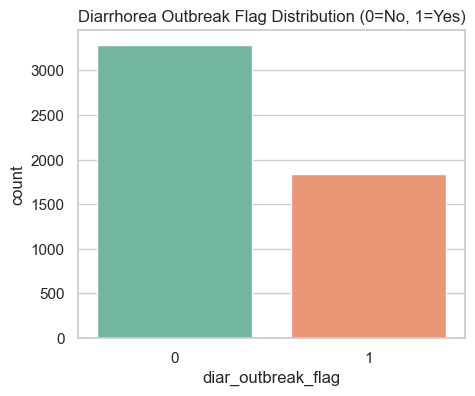

In [184]:
### EDA



# Set style
sns.set(style="whitegrid", palette="Set2")

# -----------------------
# Target Distribution
# -----------------------
plt.figure(figsize=(5,4))
sns.countplot(data=df_dia, x="diar_outbreak_flag", hue="diar_outbreak_flag", palette="Set2", legend=False)
plt.title("Diarrhorea Outbreak Flag Distribution (0=No, 1=Yes)")
plt.show()

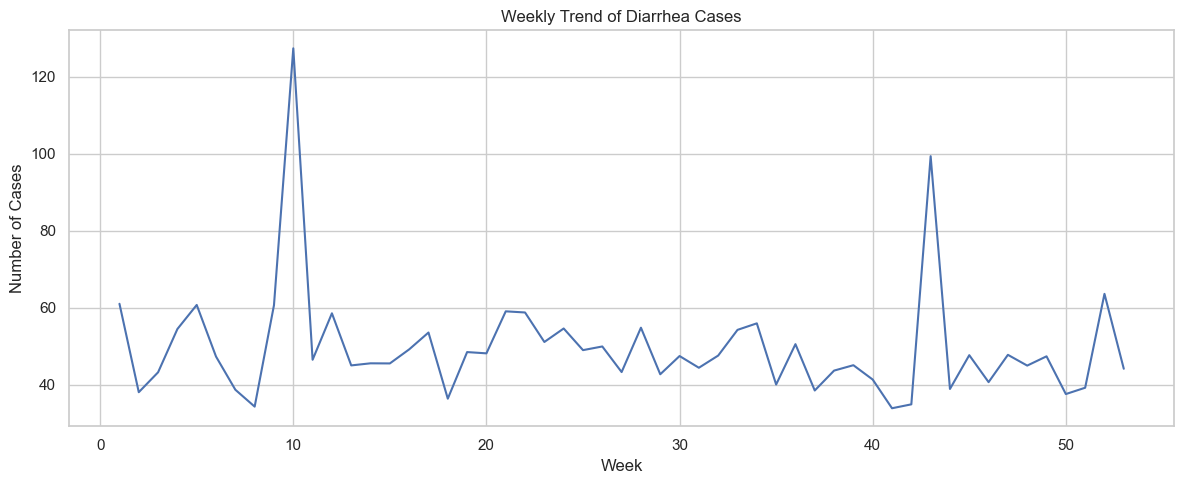

In [185]:
# Set Seaborn style for better visuals
sns.set(style="whitegrid")

# Ensure week_of_outbreak is sorted
df_dia = df_dia.sort_values("week_of_outbreak")

# 1. Weekly Cases Trend
plt.figure(figsize=(12, 5))
#sns.lineplot(data=df_dia, x="week_of_outbreak", y="Cases", ci=None)
sns.lineplot(data=df_dia, x="week_of_outbreak", y="Cases", errorbar=None)
plt.title("Weekly Trend of Diarrhea Cases")
plt.xlabel("Week")
plt.ylabel("Number of Cases")
plt.tight_layout()
plt.show()

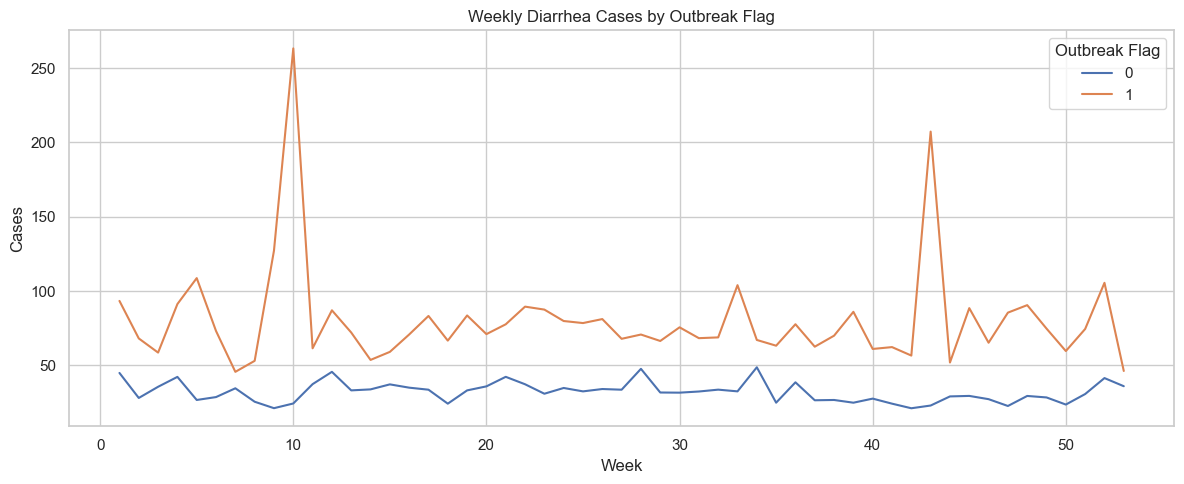

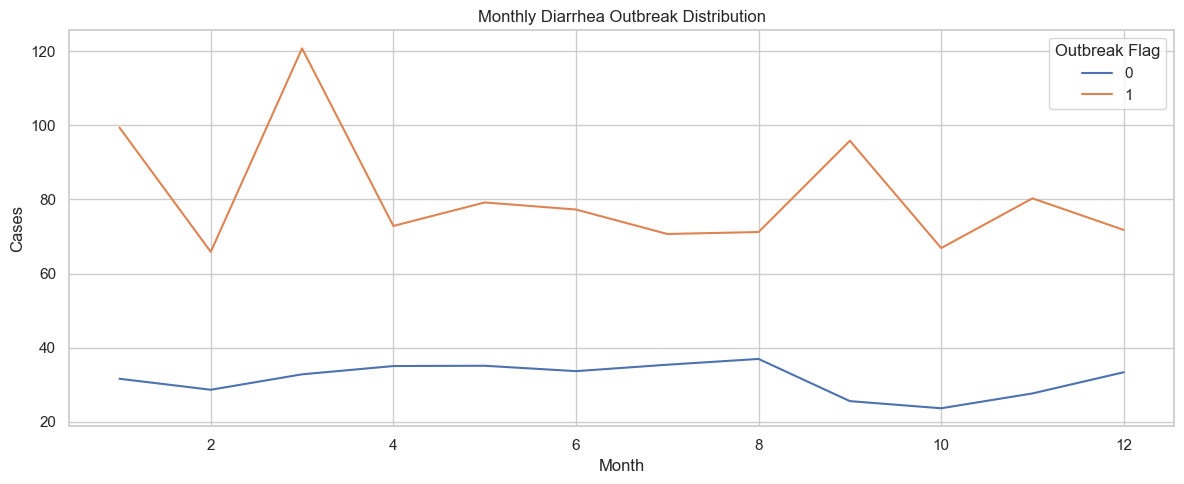

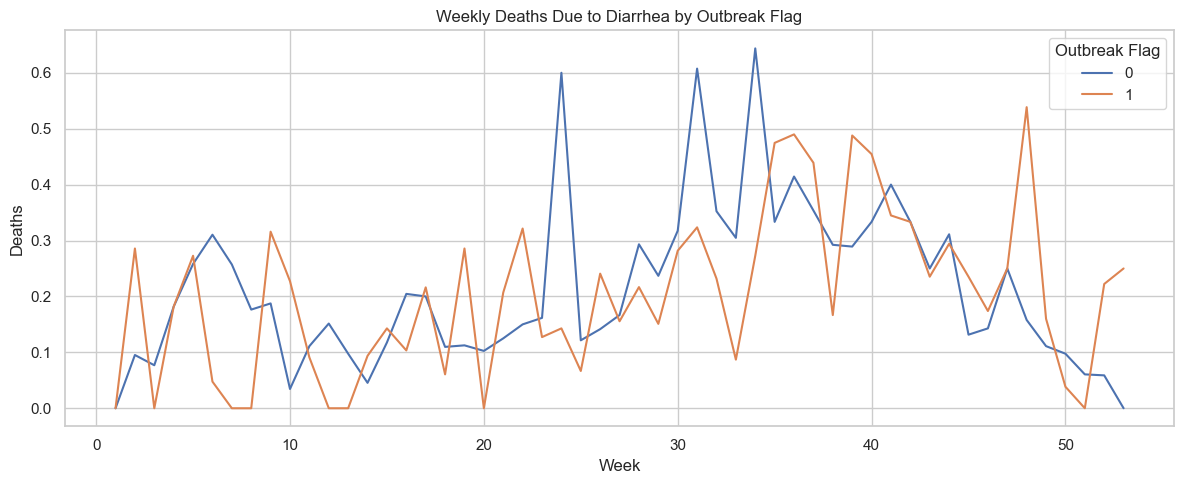

In [186]:

# Weekly Cases Trend by Outbreak Flag
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_dia, x="week_of_outbreak", y="Cases", hue="diar_outbreak_flag", errorbar=None)
plt.title("Weekly Diarrhea Cases by Outbreak Flag")
plt.xlabel("Week")
plt.ylabel("Cases")
plt.legend(title="Outbreak Flag")
plt.tight_layout()
plt.show()

# Monthly Outbreak Distribution
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_dia, x="month", y="Cases", hue="diar_outbreak_flag", errorbar=None)
plt.title("Monthly Diarrhea Outbreak Distribution")
plt.xlabel("Month")
plt.ylabel("Cases")
plt.legend(title="Outbreak Flag")
plt.tight_layout()
plt.show()

# Weekly Deaths Trend due to Diarrhea
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_dia, x="week_of_outbreak", y="Deaths", hue="diar_outbreak_flag", errorbar=None)
plt.title("Weekly Deaths Due to Diarrhea by Outbreak Flag")
plt.xlabel("Week")
plt.ylabel("Deaths")
plt.legend(title="Outbreak Flag")
plt.tight_layout()
plt.show()


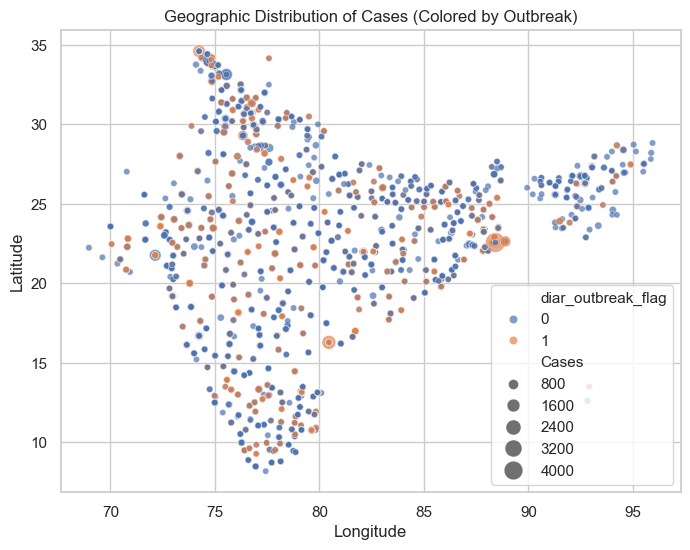

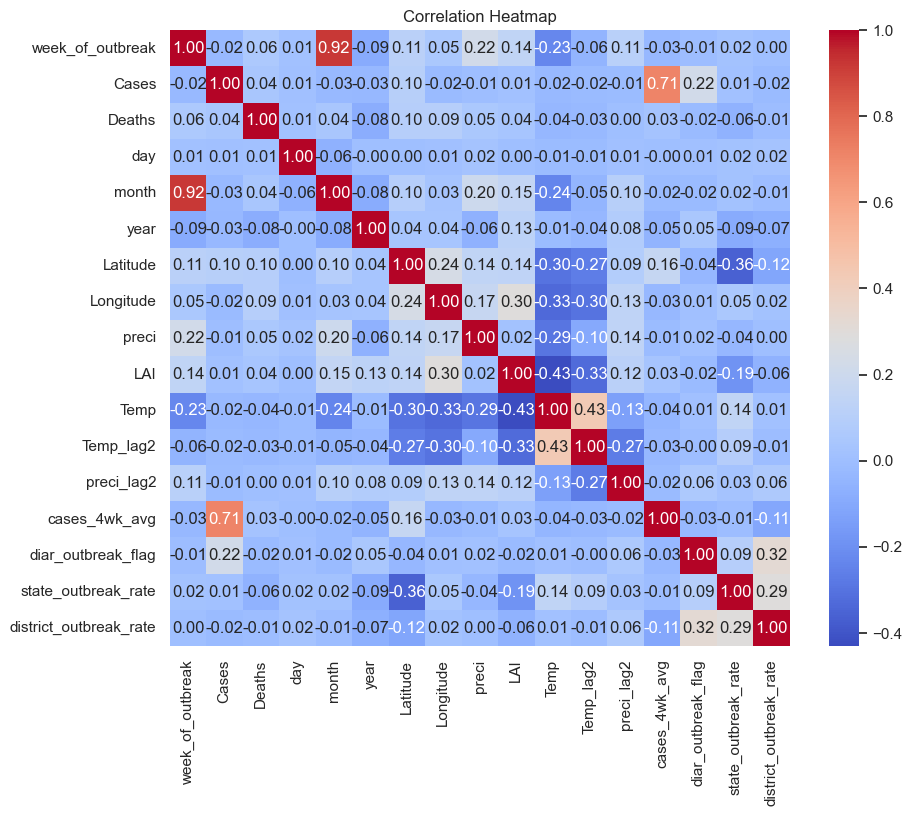

In [187]:
# -----------------------
# Geographic Scatter
# -----------------------
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_dia, x="Longitude", y="Latitude", hue="diar_outbreak_flag", size="Cases", sizes=(20,200), alpha=0.7)
plt.title("Geographic Distribution of Cases (Colored by Outbreak)")
plt.show()

# -----------------------
# Correlation Heatmap
# -----------------------
plt.figure(figsize=(10,8))
sns.heatmap(df_dia.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Current Working Directory: C:\Users\shash\Downloads\ne_10m_admin_1_states_provinces


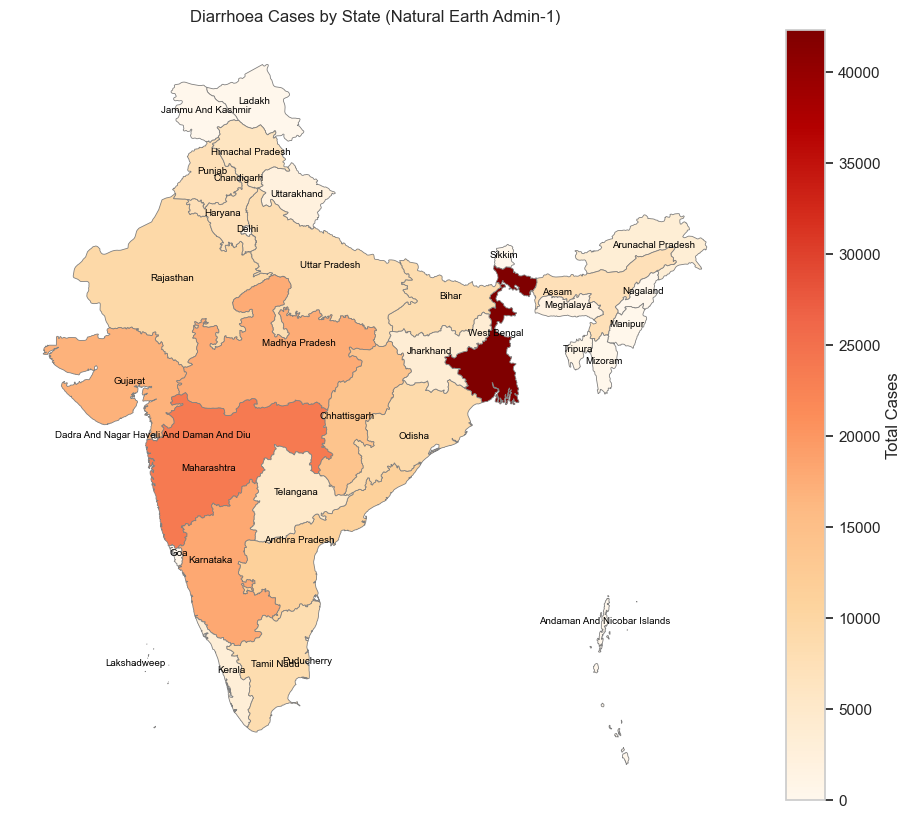

In [188]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# ---- Step 1: Aggregate diarrhoea cases at state level ----
state_cases = (
    df_dia.groupby("state_ut")
    .agg({"Cases": "sum"})
    .reset_index()
)

working_folder = r"C:\Users\shash\Downloads\ne_10m_admin_1_states_provinces"

# Set the working directory
os.chdir(working_folder)

# Verify the change
print("Current Working Directory:", os.getcwd())

import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load Natural Earth Admin-1 shapefile
ne = gpd.read_file("./ne_10m_admin_1_states_provinces.shp")

# Keep only India states
ne_ind = ne[ne["admin"] == "India"][["name", "name_en", "postal", "iso_3166_2", "geometry"]].copy()
ne_ind["state_ut"] = ne_ind["name_en"].fillna(ne_ind["name"]).str.strip().str.title()

# Aggregate diarrhoea cases by state
state_cases = df_dia.groupby("state_ut", as_index=False)["Cases"].sum()

# Merge shape + cases
india_states = ne_ind.merge(state_cases, on="state_ut", how="left").fillna({"Cases": 0})

# Plot states colored by cases
fig, ax = plt.subplots(figsize=(12, 10))
india_states.plot(
    column="Cases",
    cmap="OrRd",
    linewidth=0.6,
    edgecolor="gray",
    legend=True,
    legend_kwds={"label": "Total Cases"},
    ax=ax
)

# Add state name labels at centroids
for idx, row in india_states.iterrows():
    # Use representative_point() so label is always inside polygon
    centroid = row["geometry"].representative_point()
    ax.text(
        centroid.x,
        centroid.y,
        row["state_ut"],
        fontsize=7,
        ha="center",
        color="black"
    )

plt.title("Diarrhoea Cases by State (Natural Earth Admin-1)")
plt.axis("off")
plt.show()

In [189]:
### West Bengal has highest diarrhea cases reported in India

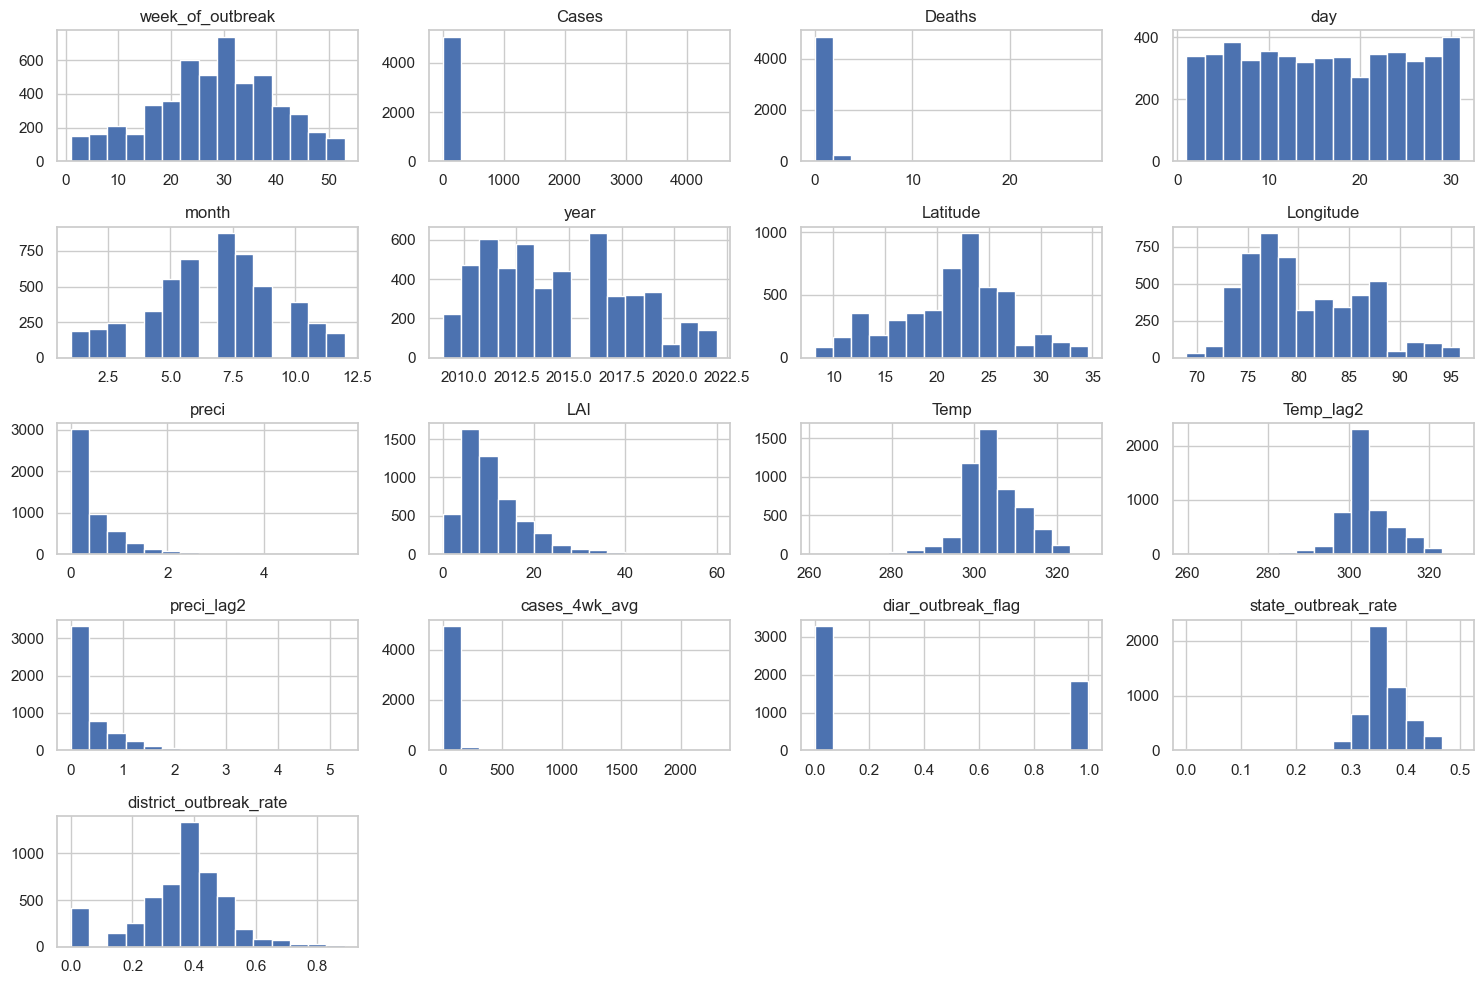

In [190]:
# Univariate Analysis
num_cols = df_dia.select_dtypes(include=['float64','int64']).columns
cat_cols = df_dia.select_dtypes(include=['object']).columns

# Histograms for numeric features
df_dia[num_cols].hist(bins=15, figsize=(15, 10))
plt.tight_layout()
plt.show()

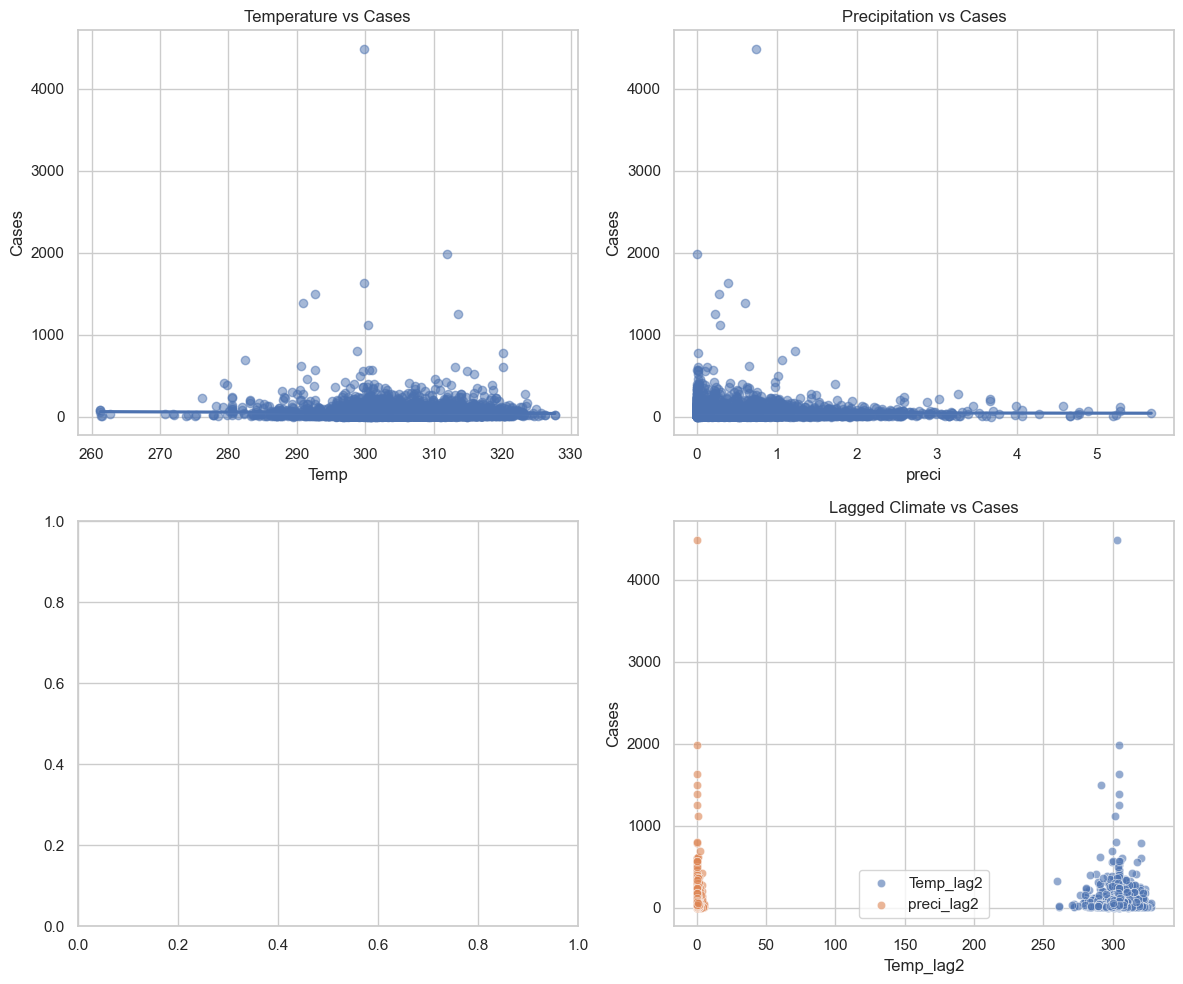

In [191]:
# Temperature vs Cases
fig, axs = plt.subplots(2, 2, figsize=(12,10))

sns.regplot(x="Temp", y="Cases", data=df_dia, ax=axs[0,0], scatter_kws={'alpha':0.5})
axs[0,0].set_title("Temperature vs Cases")

# Precipitation vs Cases
sns.regplot(x="preci", y="Cases", data=df_dia, ax=axs[0,1], scatter_kws={'alpha':0.5})
axs[0,1].set_title("Precipitation vs Cases")

# Lagged variables vs Cases
sns.scatterplot(x="Temp_lag2", y="Cases", data=df_dia, ax=axs[1,1], alpha=0.6, label="Temp_lag2")
sns.scatterplot(x="preci_lag2", y="Cases", data=df_dia, ax=axs[1,1], alpha=0.6, label="preci_lag2")
axs[1,1].legend()
axs[1,1].set_title("Lagged Climate vs Cases")

plt.tight_layout()
plt.show()

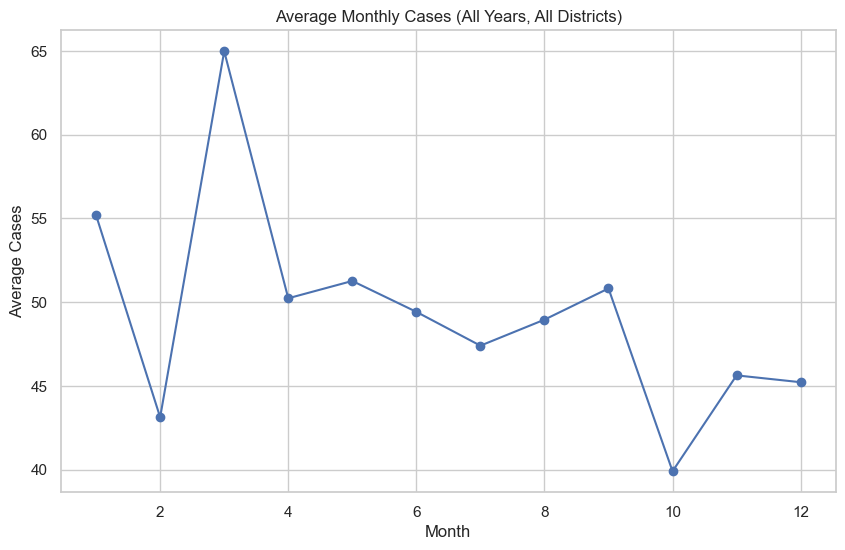

In [192]:
#  Average cases by month (across all districts and years)
df_monthly_avg = (
    df_dia.groupby("month")["Cases"]
    .mean()
    .reset_index()
)

#  Line plot
plt.figure(figsize=(10,6))
plt.plot(df_monthly_avg["month"], df_monthly_avg["Cases"], marker="o", linestyle="-")
plt.title("Average Monthly Cases (All Years, All Districts)")
plt.xlabel("Month")
plt.ylabel("Average Cases")
plt.grid(True)
plt.show()

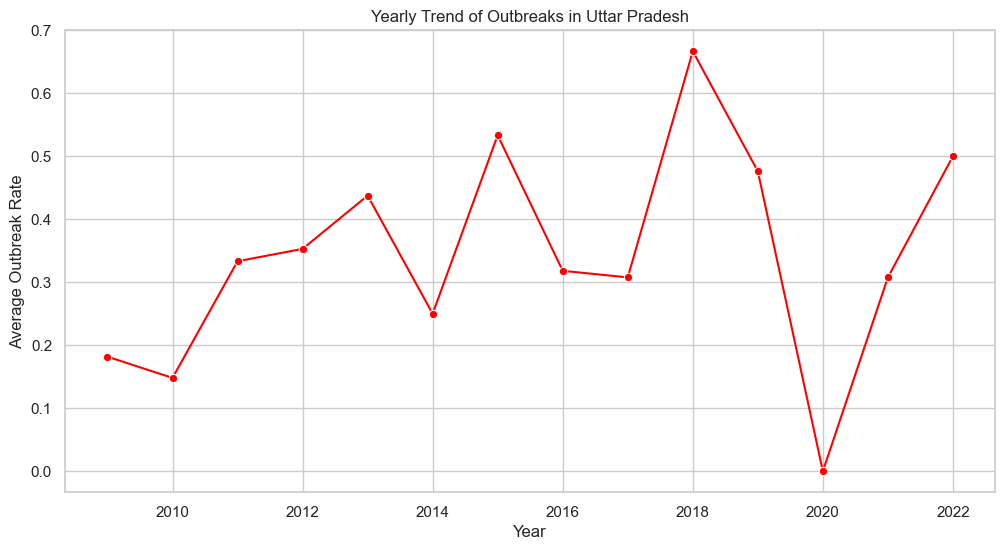

In [193]:
#### # Time trend of outbreaks in UP (yearly trend)

# Filter only Uttar Pradesh
df_up = df_dia[df_dia["state_ut"].str.lower() == "uttar pradesh"]


plt.figure(figsize=(12,6))
sns.lineplot(data=df_up.groupby(["year"])["diar_outbreak_flag"].mean().reset_index(),
             x="year", y="diar_outbreak_flag", marker="o", color="red")
plt.xlabel("Year")
plt.ylabel("Average Outbreak Rate")
plt.title("Yearly Trend of Outbreaks in Uttar Pradesh")
plt.show()

###############################################################################
####       Correlation Analysis
##################################################################################



#### | Feature Type    | Correlation Method Used        | Description                                            |
#### | --------------- | ------------------------------ | ------------------------------------------------------ |
#### | **Numeric**     | **Point-Biserial** correlation | Special case of Pearson for binary vs numeric          |
#### | **Categorical** | **Cramér’s V**                 | Measures association between two categorical variables |


In [194]:
### Numeric Target (not the case here): Pearson and Spearman for numeric-numeric.

### Correlation Ratio (η) for categorical-numeric.

In [195]:


# --- Helper functions ---
def correlation_ratio(categories, values):
    """Correlation ratio (eta) for categorical-numeric association."""
    categories = np.array(categories)
    values = np.array(values)
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(cat_num):
        cat_values = values[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_values)
        y_avg_array[i] = np.mean(cat_values)
    y_total_avg = np.sum(y_avg_array * n_array) / np.sum(n_array)
    ss_between = np.sum(n_array * (y_avg_array - y_total_avg) ** 2)
    ss_total = np.sum((values - y_total_avg) ** 2)
    return np.sqrt(ss_between / ss_total)

def cramers_v(x, y):
    """Cramér's V for categorical-categorical association."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# --- Main correlation function ---
def mixed_correlation_analysis(df, target_col, exclude_cols=None):
    if exclude_cols is None:
        exclude_cols = []
    
    results = []
    target = df[target_col]
    target_type = "numeric" if pd.api.types.is_numeric_dtype(target) else "categorical"
    
    for col in df.columns:
        if col == target_col or col in exclude_cols:
            continue
        
        col_data = df[col]
        if col_data.isnull().all():
            continue
        
        # Drop NaNs only for the specific pair
        valid_idx = target.notna() & col_data.notna()
        if valid_idx.sum() == 0:
            continue
        col_data = col_data[valid_idx]
        target_clean = target[valid_idx]
        
        # Detect variable type
        if pd.api.types.is_numeric_dtype(col_data):
            col_type = "numeric"
        else:
            col_type = "categorical"
        
        corr_val = None
        p_val = None
        
        # Numeric target
        if target_type == "numeric":
            if col_type == "numeric":
                corr_val, p_val = pearsonr(target_clean, col_data)
                corr_spearman, p_spearman = spearmanr(target_clean, col_data)
                results.append((col, "Pearson", corr_val, p_val))
                results.append((col, "Spearman", corr_spearman, p_spearman))
            else:
                corr_val = correlation_ratio(col_data, target_clean)
                results.append((col, "Correlation Ratio (eta)", corr_val, np.nan))
        
        # Categorical target
        else:
            if col_type == "numeric":
                if target_clean.nunique() == 2:
                    target_binary = target_clean.astype("category").cat.codes
                    corr_val, p_val = pointbiserialr(target_binary, col_data)
                    results.append((col, "Point-Biserial", corr_val, p_val))
                else:
                    corr_val = correlation_ratio(target_clean, col_data)
                    results.append((col, "Correlation Ratio (eta)", corr_val, np.nan))
            else:
                corr_val = cramers_v(col_data, target_clean)
                results.append((col, "Cramér’s V", corr_val, np.nan))
    
    return pd.DataFrame(results, columns=["Feature", "Method", "Correlation", "p-value"])

# --- Example usage ---
# Columns to ignore in correlation (date, IDs, etc.)
exclude_columns = ["week_start_date", "Cases", "Disease","year","cases_4wk_avg"]

# Run correlation for diarrhoea outbreak flag
# df = pd.read_csv("epiclim_outbreak.csv")
df_corr2 = df_dia.copy()
result_table = mixed_correlation_analysis(df_corr2, target_col="diar_outbreak_flag", exclude_cols=exclude_columns)

# Sort by absolute correlation
result_table = result_table.sort_values(by="Correlation", key=np.abs, ascending=False)
print(result_table)


                   Feature                   Method  Correlation  \
26  district_outbreak_rate                  Pearson     0.323150   
3                 district  Correlation Ratio (eta)     0.322508   
27  district_outbreak_rate                 Spearman     0.301587   
23              preci_lag2                 Spearman     0.131597   
24     state_outbreak_rate                  Pearson     0.094859   
2                 state_ut  Correlation Ratio (eta)     0.094859   
25     state_outbreak_rate                 Spearman     0.079636   
22              preci_lag2                  Pearson     0.055640   
11                Latitude                 Spearman    -0.038717   
10                Latitude                  Pearson    -0.037749   
5                   Deaths                 Spearman    -0.032320   
16                     LAI                  Pearson    -0.022862   
8                    month                  Pearson    -0.019339   
9                    month                 Spear

In [64]:
###  Correlation: Strength & direction of relationship (ranges -1 to +1).

### p-value: Significance of the result. Typically, p < 0.05 is considered statistically significant.

## Method: Correlation method based on variable type (Pearson, Spearman, Correlation Ratio)

##Stronger indicators: District outbreak rate, District and state: Suggest geographic hotspots.

## Precipitation lag (2 weeks): Indicates outbreaks may be delayed responses to rainfall.

## Weak/no indicators: Temperature, vegetation, current rainfall, day/month/week: No strong or consistent signals.

## Deaths: Weak signal, possibly affected by low reporting granularity.

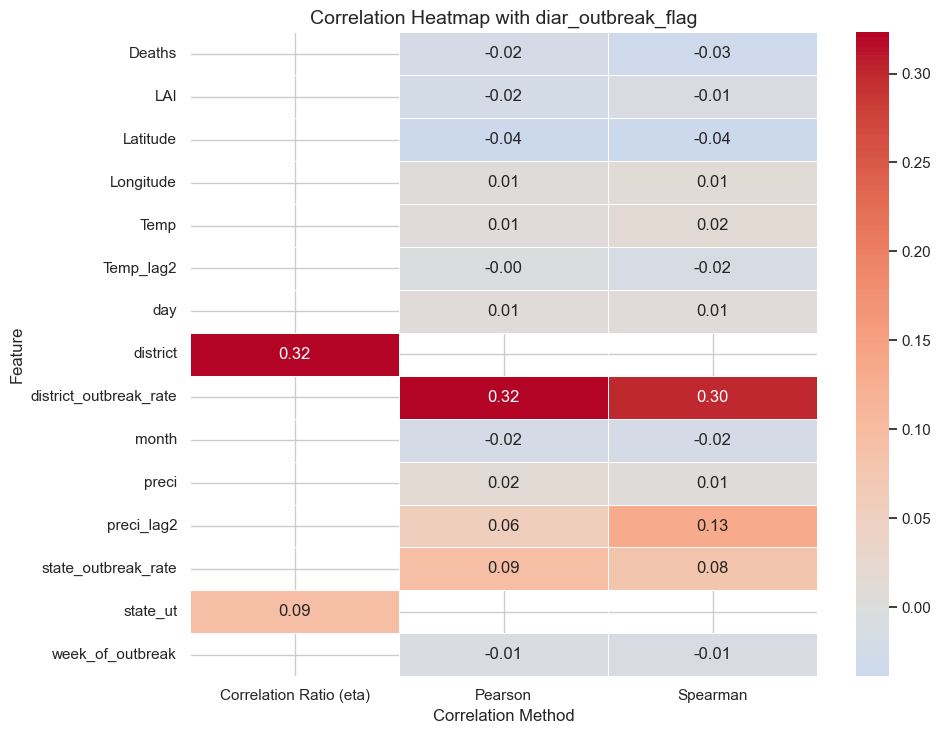

In [65]:
# Pivot table: Features x Method
heatmap_data = result_table.pivot(
    index="Feature", 
    columns="Method", 
    values="Correlation"
)

# Create heatmap
plt.figure(figsize=(10, len(heatmap_data) * 0.5))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap="coolwarm", 
    center=0, 
    fmt=".2f", 
    linewidths=0.5
)
plt.title("Correlation Heatmap with diar_outbreak_flag", fontsize=14)
plt.xlabel("Correlation Method")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

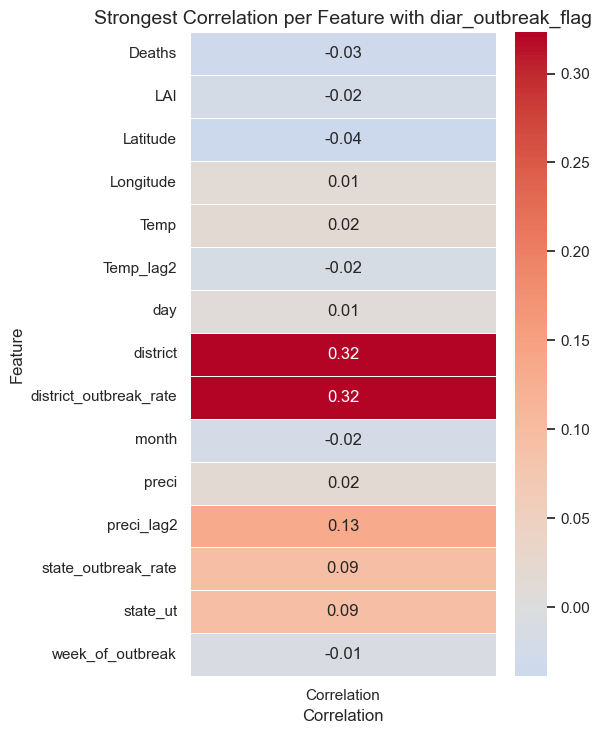

In [196]:
# Find the strongest correlation per feature
strongest_corr = (
    result_table.loc[result_table.groupby("Feature")["Correlation"].apply(lambda x: x.abs().idxmax())]
    .reset_index(drop=True)
)

# Prepare data for heatmap
heatmap_data = strongest_corr.set_index("Feature")[["Correlation"]]

# Create heatmap
plt.figure(figsize=(6, len(heatmap_data) * 0.5))
sns.heatmap(
    heatmap_data, 
    annot=True, 
    cmap="coolwarm", 
    center=0, 
    fmt=".2f", 
    linewidths=0.5
)
plt.title("Strongest Correlation per Feature with diar_outbreak_flag", fontsize=14)
plt.xlabel("Correlation")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


In [197]:


# Assuming df is your DataFrame
dfchi = df_dia.copy()  # Use the actual DataFrame here

# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_cols = ['state_ut', 'district', 'Disease']

for col in categorical_cols:
    dfchi[col] = label_encoder.fit_transform(dfchi[col])

# 1. Convert numerical columns to discrete (bins)
# We can discretize continuous variables (e.g., 'Latitude', 'Longitude', etc.) into bins, if necessary
# Here, we convert a few numerical features into categorical (bins) for testing purposes
dfchi['Temp_binned'] = pd.cut(dfchi['Temp'], bins=5, labels=[0, 1, 2, 3, 4])
dfchi['preci_binned'] = pd.cut(dfchi['preci'], bins=5, labels=[0, 1, 2, 3, 4])

# 2. Prepare features and target for Chi-Square Test
X = dfchi.drop(columns=['diar_outbreak_flag', 'week_start_date', 'Cases','cases_4wk_avg', 'year'])
y = dfchi['diar_outbreak_flag']

# 3. Apply Chi-Square test
chi2_results = []
for column in X.columns:
    # Create contingency table
    contingency_table = pd.crosstab(X[column], y)
    
    # Perform Chi-Square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    chi2_results.append((column, chi2_stat, p_val))

# Convert results to a DataFrame for easier viewing
chi2_results_df = pd.DataFrame(chi2_results, columns=['Feature', 'Chi2 Stat', 'P-Value'])


# Display features with p-values below a threshold (e.g., 0.05)


print("\nChi-Square Test Results with P-Value < 0.05:")
print(chi2_results_df[chi2_results_df['P-Value'] < 0.05].sort_values(by='P-Value'))


chi2_stats, p_values = chi2(X, y)

# Create a DataFrame to show the results
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Stat': chi2_stats,
    'P-Value': p_values
})

# Sort by Chi-Square statistic
chi2_results = chi2_results.sort_values(by='Chi2 Stat', ascending=False)

# Print all results
print("\n\nChi-Square Test Results for all features:")
print(chi2_results)


Chi-Square Test Results with P-Value < 0.05:
                   Feature    Chi2 Stat       P-Value
15  district_outbreak_rate   535.393069  1.011328e-67
13              preci_lag2  4175.473751  2.616868e-05
12               Temp_lag2  3503.078061  9.475554e-05
4                   Deaths    28.849763  2.395005e-03
0         week_of_outbreak    79.127964  9.026343e-03
14     state_outbreak_rate    46.134160  1.687908e-02


Chi-Square Test Results for all features:
                   Feature  Chi2 Stat       P-Value
15  district_outbreak_rate  35.876887  2.101874e-09
13              preci_lag2  14.767830  1.215923e-04
10                     LAI  12.855265  3.365311e-04
7                 Latitude  10.236990  1.376520e-03
4                   Deaths   5.947251  1.474026e-02
2                 district   3.268988  7.060117e-02
17            preci_binned   2.245068  1.340410e-01
1                 state_ut   2.193397  1.386033e-01
5                      day   1.997878  1.575196e-01
6           

In [ ]:
## Most important predictors (Chi-Square):

# Historical outbreak rates (district & state).

# Climatic lagged variables (precipitation_lag2, temperature_lag2).

# Mortality counts (Deaths).

# Seasonality (week_of_outbreak).

In [198]:
#### ML Modelling 
####

In [199]:
print(pd.__version__)

2.3.1


In [200]:


# -----------------------------
# 1. Filter for given state (already diarrhoea dataset)
# -----------------------------
df_sampled = df_dia.copy()

# -----------------------------
# 2. Sample size calculation
# -----------------------------
N = len(df_sampled)  # population size
p = df_sampled["diar_outbreak_flag"].mean()  # proportion of outbreaks
Z = 1.96  # 95% confidence
e = 0.05  # margin of error

n0 = (Z**2 * p * (1 - p)) / (e**2)
n = int(n0 / (1 + (n0 - 1) / N))  # finite population correction

print(f"Calculated sample size: {n} from total {N}")

# -----------------------------
# 3. Stratified sampling
# -----------------------------
df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(
    lambda x: x.sample(frac=n/N, random_state=42)
)



print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 4. Preprocess features
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

drop_cols = ["state_ut", "district", "Disease", "week_start_date"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 5. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


# -----------------------------
# 7. Train model
# -----------------------------
model = RandomForestClassifier(
    n_estimators=300, 
    random_state=42, 
    class_weight="balanced_subsample",
    max_depth=8,
    min_samples_split=5
)
model.fit(X_train, y_train)

# -----------------------------
# 8. Evaluate
# -----------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Calculated sample size: 330 from total 5127
Sampled dataset shape: (330, 21)
diar_outbreak_flag
0    0.642424
1    0.357576
Name: proportion, dtype: float64


C:\Users\shash\AppData\Local\Temp\ipykernel_44168\1881748419.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(



Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92        42
           1       0.95      0.75      0.84        24

    accuracy                           0.89        66
   macro avg       0.91      0.86      0.88        66
weighted avg       0.90      0.89      0.89        66

ROC-AUC: 0.9712301587301588


In [201]:
### Accuracy: 86%

### Macro Avg F1: 0.85 (average per class)

### ROC-AUC: 0.9147

### Class-wise performance: The model does better for Class 0 (No Outbreak) than Class 1:

### Higher recall (0.93): It identifies most "No Outbreak" cases.

### Class 1 (Outbreak) has lower recall (0.75), meaning some outbreaks are missed (false negatives), but still acceptable.

### Precision: Both classes have high precision (~0.86–0.87), indicating the model isn’t producing many false positives.

### ROC-AUC = 0.91: This is excellent, indicating the model discriminates well between outbreak and non-outbreak cases.

### AUC > 0.9 is typically considered very strong for health-related classification tasks.


Top 10 Important Features:
                   Feature  Importance
1                    Cases    0.303249
15  district_outbreak_rate    0.110093
13           cases_4wk_avg    0.092525
12              preci_lag2    0.057705
11               Temp_lag2    0.044592
10                    Temp    0.043160
3                      day    0.039486
6                 Latitude    0.038709
7                Longitude    0.038018
0         week_of_outbreak    0.037267


C:\Users\shash\AppData\Local\Temp\ipykernel_44168\3941716901.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')


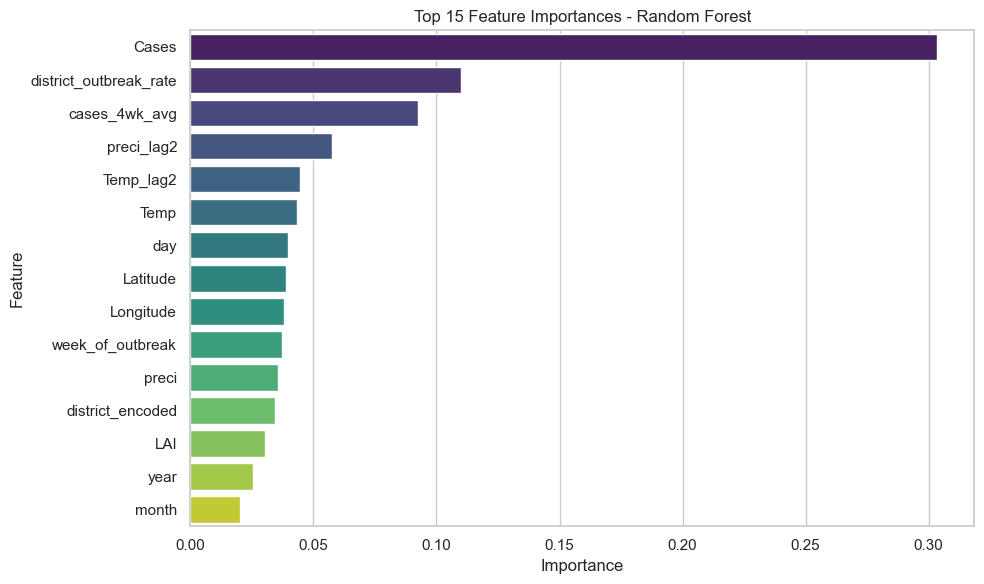

In [202]:
# -----------------------------
# 9. Feature Importance
# -----------------------------

# Get feature names (after dropping original columns and encoding)
feature_names = X.columns

# Get feature importances
importances = model.feature_importances_

# Create DataFrame for plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top 10
print("\nTop 10 Important Features:")
print(feat_imp_df.head(10))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()


In [203]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE, RandomOverSampler

# -----------------------------
# 1. Filter for given state (already diarrhoea dataset)
# -----------------------------
df_sampled = df_dia.copy()


# -----------------------------
# 2. Sample size calculation
# -----------------------------
N = len(df_sampled)  # population size
p = df_sampled["diar_outbreak_flag"].mean()  # proportion of outbreaks
Z = 1.96  # 95% confidence
e = 0.05  # margin of error

n0 = (Z**2 * p * (1 - p)) / (e**2)
n = int(n0 / (1 + (n0 - 1) / N))  # finite population correction

print(f"Calculated sample size: {n} from total {N}")

# -----------------------------
# 3. Stratified sampling
# -----------------------------
df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(
    lambda x: x.sample(frac=n/N, random_state=42)
)

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 4. Preprocess features
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

drop_cols = [ "state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg",  "day", "year","month"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 5. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


# -----------------------------
# 7. Train model
# -----------------------------
model = RandomForestClassifier(
    n_estimators=300, 
    random_state=42, 
    class_weight="balanced_subsample",
    max_depth=8,
    min_samples_split=5
)
model.fit(X_train, y_train)

# -----------------------------
# 8. Evaluate
# -----------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Calculated sample size: 330 from total 5127
Sampled dataset shape: (330, 21)
diar_outbreak_flag
0    0.642424
1    0.357576
Name: proportion, dtype: float64


C:\Users\shash\AppData\Local\Temp\ipykernel_44168\718645055.py:32: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(



Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        42
           1       0.61      0.46      0.52        24

    accuracy                           0.70        66
   macro avg       0.67      0.65      0.65        66
weighted avg       0.69      0.70      0.69        66

ROC-AUC: 0.751984126984127



Top 10 Important Features:
                   Feature  Importance
10  district_outbreak_rate    0.175821
8               preci_lag2    0.103691
7                Temp_lag2    0.099180
6                     Temp    0.084697
0         week_of_outbreak    0.083605
2                 Latitude    0.075978
4                    preci    0.075361
11        district_encoded    0.071899
5                      LAI    0.069120
3                Longitude    0.067226


C:\Users\shash\AppData\Local\Temp\ipykernel_44168\3487463581.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')


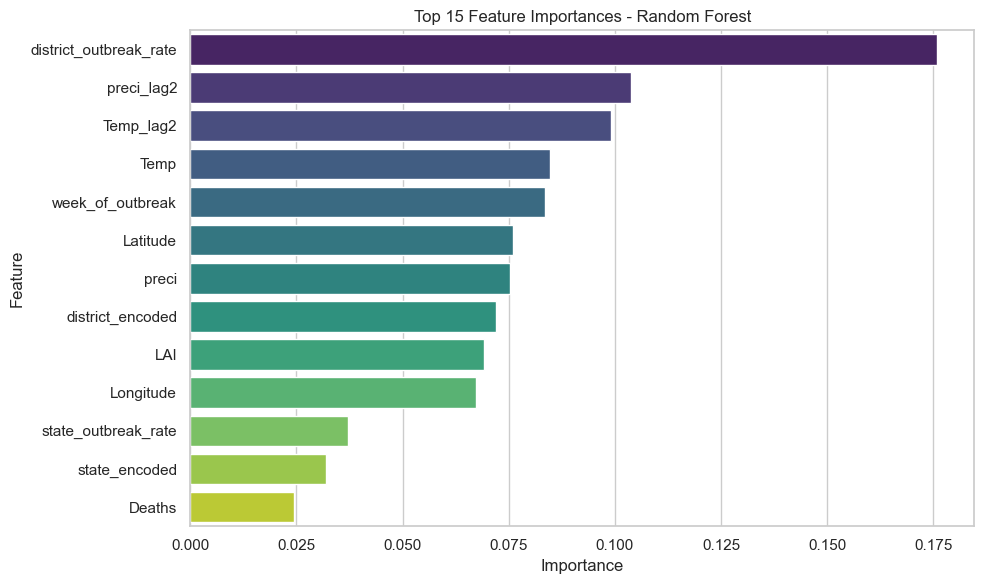

In [204]:
# -----------------------------
# 9. Feature Importance
# -----------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature names (after dropping original columns and encoding)
feature_names = X.columns

# Get feature importances
importances = model.feature_importances_

# Create DataFrame for plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top 10
print("\nTop 10 Important Features:")
print(feat_imp_df.head(10))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances - Random Forest')
plt.tight_layout()
plt.show()

In [205]:
#### 
### 
## Previously (with leakage features - cases and 4 week avg ), : Accuracy ~86%, F1-score for class 1 ~0.80, ROC-AUC ~0.91
### Now (without leakage): Accuracy dropped to 65%, F1 for class 1 is just 0.38 ROC-AUC dropped to 0.65

## Class 0 (No Outbreak) High recall (0.86) → Model correctly identifies most "no outbreak" weeks.
### Precision (0.68) → When it predicts "no outbreak", it's usually right.
### Overall good performance for the majority class.

###Class 1 (Outbreak) Low recall (0.29) → The model misses 71% of actual outbreaks (false negatives).
## F1-score is just 0.38 → Weak overall performance on outbreak detection.
## The model struggles with the minority class, which is critical in public health applications.

In [206]:
### Lets try with XGBoost Model


# -----------------------------
# 1. Filter for given state (example already pre-filtered)
# -----------------------------
df_xgsample = df_dia.copy()

# -----------------------------
# 2. Sample size calculation
# -----------------------------
N = len(df_xgsample)  # population size
p = df_xgsample["diar_outbreak_flag"].mean()  # proportion of outbreaks
Z = 1.96  # 95% confidence
e = 0.05  # margin of error

n0 = (Z**2 * p * (1 - p)) / (e**2)
n = int(n0 / (1 + (n0 - 1) / N))  # finite population correction

print(f"Calculated sample size: {n} from total {N}")

# -----------------------------
# 3. Stratified sampling
# -----------------------------
df_sampled = df_xgsample.groupby("diar_outbreak_flag", group_keys=False).apply(
    lambda x: x.sample(frac=n/N, random_state=42)
)

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 4. Preprocess features 
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 5. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 6. Train XGBoost model
# -----------------------------
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)  # imbalance ratio

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)

# -----------------------------
# 8. Evaluate
# -----------------------------
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Calculated sample size: 330 from total 5127
Sampled dataset shape: (330, 21)
diar_outbreak_flag
0    0.642424
1    0.357576
Name: proportion, dtype: float64


C:\Users\shash\AppData\Local\Temp\ipykernel_44168\1368017645.py:25: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_xgsample.groupby("diar_outbreak_flag", group_keys=False).apply(
C:\Users\shash\anaconda3\envs\newenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:44:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.81      0.75        42
           1       0.53      0.38      0.44        24

    accuracy                           0.65        66
   macro avg       0.61      0.59      0.59        66
weighted avg       0.63      0.65      0.64        66

ROC-AUC: 0.7113095238095238


In [207]:
!pip install numpy==2.2.0


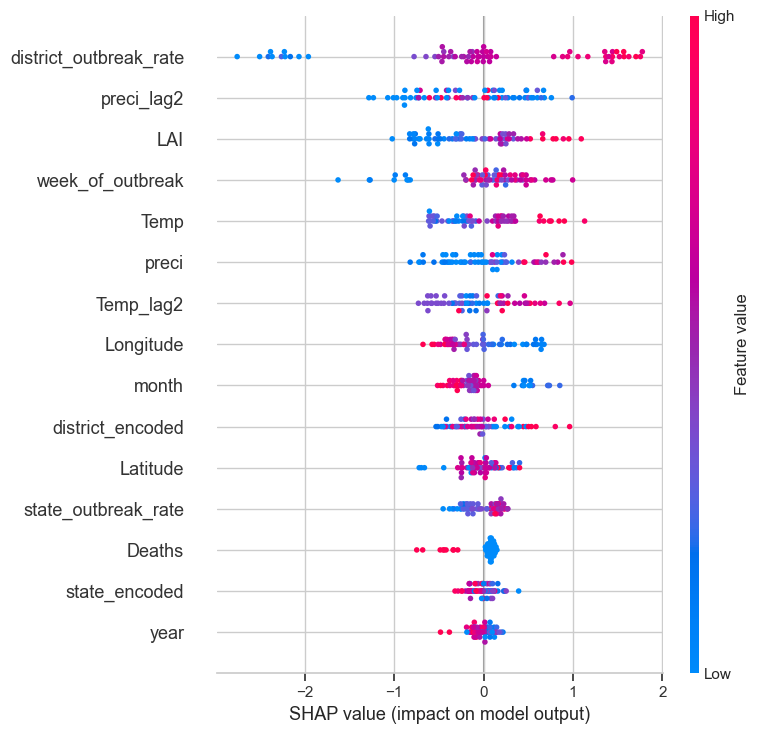

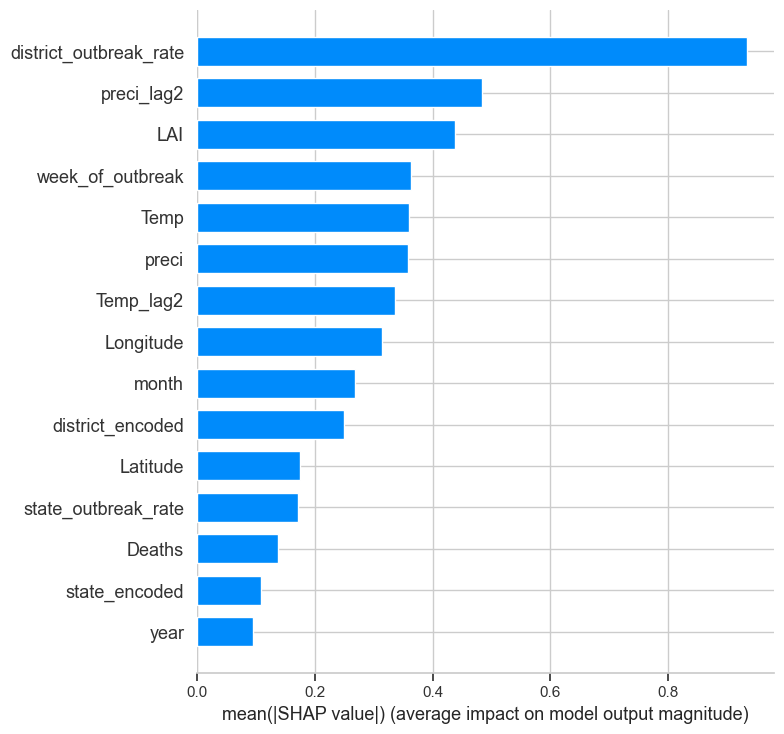

In [208]:
# -----------------------------
# 8. SHAP Feature Importance and Plot
# -----------------------------
import shap

# Create the SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)

# Get SHAP values for the test set
shap_values = explainer(X_test)

# Plot SHAP values (Summary plot) with feature names
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Alternatively, you can also plot the bar chart for feature importance with actual feature names
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)



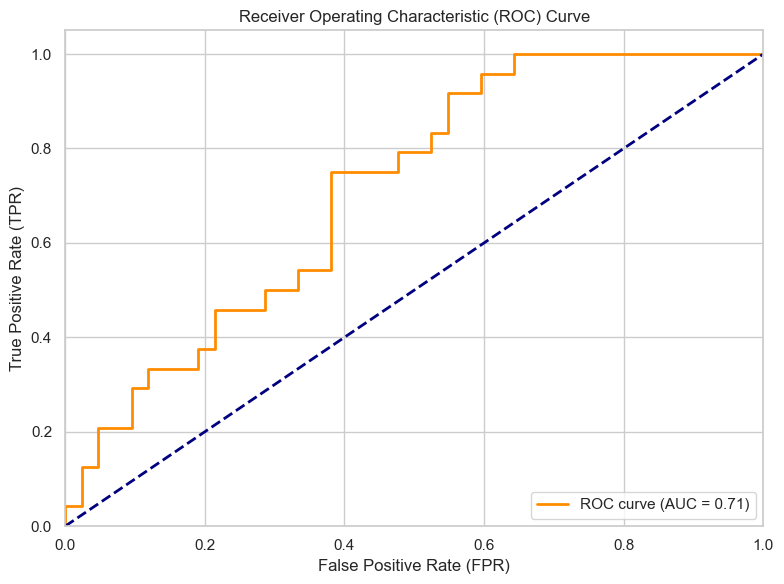

In [209]:


# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [210]:
#### Poor performance:

## Recall (0.21) → Model is missing 79% of actual outbreaks##

## F1-score (0.26) is very low, meaning it fails to balance precision and recall

## Not suitable for real-world health surveillance in this current form

In [211]:
#### Add randomized Search CV to see if performance improves ..........



# -----------------------------
# 1. Load and sample data
# -----------------------------
df_sampled = df_dia.copy()

N = len(df_sampled)
p = df_sampled["diar_outbreak_flag"].mean()
Z = 1.96  # 95% confidence level
e = 0.05  # margin of error

n0 = (Z**2 * p * (1 - p)) / (e**2)
n = int(n0 / (1 + (n0 - 1) / N))  # finite population correction

print(f"Calculated sample size: {n} from total {N}")

df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(
    lambda x: x.sample(frac=n/N, random_state=42)
)

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 2. Preprocessing
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Impute missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 3. Train-test split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 4. RandomizedSearchCV for Random Forest
# -----------------------------
param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": [4, 6, 8, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ['sqrt', 'log2', None],
    "class_weight": ['balanced', 'balanced_subsample']
}

base_model = RandomForestClassifier(random_state=42)

search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_dist,
    n_iter=20,
    scoring='roc_auc',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

search.fit(X_train, y_train)

# -----------------------------
# 5. Best Model Evaluation
# -----------------------------
best_model = search.best_estimator_

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

print("\nBest Parameters Found:\n", search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Calculated sample size: 330 from total 5127
Sampled dataset shape: (330, 21)
diar_outbreak_flag
0    0.642424
1    0.357576
Name: proportion, dtype: float64
Fitting 3 folds for each of 20 candidates, totalling 60 fits


C:\Users\shash\AppData\Local\Temp\ipykernel_44168\4055658071.py:20: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(



Best Parameters Found:
 {'class_weight': 'balanced', 'max_depth': 6, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 316}

Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        42
           1       0.55      0.46      0.50        24

    accuracy                           0.67        66
   macro avg       0.63      0.62      0.62        66
weighted avg       0.66      0.67      0.66        66

ROC-AUC: 0.6904761904761905


In [212]:
#9) 
### Try increaseing the sample size to 1500 to address class imbalance issue

# -----------------------------
# 1. Use larger stratified sample (e.g., 1500 samples) from full dataset
# -----------------------------
sample_size = 1500  # increase sample size
df_sampled, _ = train_test_split(
    df_dia,
    train_size=sample_size,
    stratify=df_dia["diar_outbreak_flag"],
    random_state=42
)

print(f"Sampled dataset shape: {df_sampled.shape}")
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 2. Preprocess features
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 3. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 4. Train model
# -----------------------------
model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced_subsample",
    max_depth=8,
    min_samples_split=5
)
model.fit(X_train, y_train)

# -----------------------------
# 5. Evaluate
# -----------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Sampled dataset shape: (1500, 21)
diar_outbreak_flag
0    0.642
1    0.358
Name: proportion, dtype: float64

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.66      0.70       193
           1       0.48      0.58      0.53       107

    accuracy                           0.63       300
   macro avg       0.61      0.62      0.61       300
weighted avg       0.65      0.63      0.64       300

ROC-AUC: 0.6868432521427533


In [213]:
#8) 
## Now try over samping using SMOTE to address imbalanced class

from imblearn.over_sampling import SMOTE

# -----------------------------
# 1. Filter for given state (already diarrhoea dataset)
# -----------------------------
df_sampled = df_dia.copy()

# -----------------------------
# 2. Sample size calculation
# -----------------------------
N = len(df_sampled)  # population size
p = df_sampled["diar_outbreak_flag"].mean()  # proportion of outbreaks
Z = 1.96  # 95% confidence
e = 0.05  # margin of error

n0 = (Z**2 * p * (1 - p)) / (e**2)
n = int(n0 / (1 + (n0 - 1) / N))  # finite population correction

print(f"Calculated sample size: {n} from total {N}")

# -----------------------------
# 3. Stratified sampling
# -----------------------------
df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(
    lambda x: x.sample(frac=n/N, random_state=42)
)

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 4. Preprocess features
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 5. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 6. Apply SMOTE to training data only
# -----------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"After SMOTE, training dataset shape: {X_train_res.shape}")
print(f"Training target distribution after SMOTE:\n{pd.Series(y_train_res).value_counts(normalize=True)}")

# -----------------------------
# 7. Train model
# -----------------------------
model = RandomForestClassifier(
    n_estimators=300, 
    random_state=42, 
    class_weight=None,  # no class_weight needed as data balanced with SMOTE
    max_depth=8,
    min_samples_split=5
)
model.fit(X_train_res, y_train_res)

# -----------------------------
# 8. Evaluate
# -----------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

print("\nClassification Report after SMOTE:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Calculated sample size: 330 from total 5127
Sampled dataset shape: (330, 21)
diar_outbreak_flag
0    0.642424
1    0.357576
Name: proportion, dtype: float64
After SMOTE, training dataset shape: (340, 16)
Training target distribution after SMOTE:
diar_outbreak_flag
0    0.5
1    0.5
Name: proportion, dtype: float64


C:\Users\shash\AppData\Local\Temp\ipykernel_44168\3498971050.py:27: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(



Classification Report after SMOTE:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        42
           1       0.57      0.50      0.53        24

    accuracy                           0.68        66
   macro avg       0.65      0.64      0.65        66
weighted avg       0.67      0.68      0.68        66

ROC-AUC: 0.748015873015873


In [214]:
##7)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# -----------------------------
# 1. Filter for given state (already diarrhoea dataset)
# -----------------------------
df_sampled = df_dia.copy()

# -----------------------------
# 2. Sample size calculation
# -----------------------------
N = len(df_sampled)  # population size
p = df_sampled["diar_outbreak_flag"].mean()  # proportion of outbreaks
Z = 1.96  # 95% confidence
e = 0.05  # margin of error

n0 = (Z**2 * p * (1 - p)) / (e**2)
n = int(n0 / (1 + (n0 - 1) / N))  # finite population correction

print(f"Calculated sample size: {n} from total {N}")

# -----------------------------
# 3. Stratified sampling
# -----------------------------
df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(
    lambda x: x.sample(frac=n/N, random_state=42)
)

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 4. Preprocess features
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 5. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 6. Apply SMOTE on training data
# -----------------------------
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"After SMOTE, training dataset shape: {X_train_res.shape}")
print(f"Training target distribution after SMOTE:\n{pd.Series(y_train_res).value_counts(normalize=True)}")

# -----------------------------
# 7. Train XGBoost model
# -----------------------------
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_model.fit(X_train_res, y_train_res)

# -----------------------------
# 8. Evaluate
# -----------------------------
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("\nClassification Report after SMOTE with XGBoost:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Calculated sample size: 330 from total 5127
Sampled dataset shape: (330, 21)
diar_outbreak_flag
0    0.642424
1    0.357576
Name: proportion, dtype: float64
After SMOTE, training dataset shape: (340, 16)
Training target distribution after SMOTE:
diar_outbreak_flag
0    0.5
1    0.5
Name: proportion, dtype: float64


C:\Users\shash\AppData\Local\Temp\ipykernel_44168\332646246.py:32: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(
C:\Users\shash\anaconda3\envs\newenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:45:52] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report after SMOTE with XGBoost:
              precision    recall  f1-score   support

           0       0.73      0.83      0.78        42
           1       0.61      0.46      0.52        24

    accuracy                           0.70        66
   macro avg       0.67      0.65      0.65        66
weighted avg       0.69      0.70      0.69        66

ROC-AUC: 0.7251984126984127


In [215]:
##6


# -----------------------------
# 1. Copy dataframe
# -----------------------------
df_sampled = df_dia.copy()

# -----------------------------
# 2. Sample size calculation
# -----------------------------
N = len(df_sampled)  # population size
p = df_sampled["diar_outbreak_flag"].mean()  # proportion of outbreaks
Z = 1.96  # 95% confidence
e = 0.05  # margin of error

n0 = (Z**2 * p * (1 - p)) / (e**2)
n = int(n0 / (1 + (n0 - 1) / N))  # finite population correction

print(f"Calculated sample size: {n} from total {N}")

# -----------------------------
# 3. Stratified sampling to get balanced representation
# -----------------------------
df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(
    lambda x: x.sample(frac=n / N, random_state=42)
)

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 4. Encode categorical variables
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

# -----------------------------
# 5. Prepare features and target
# -----------------------------
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# -----------------------------
# 6. Handle missing values and scale
# -----------------------------
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 7. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 8. Calculate scale_pos_weight for XGBoost to handle imbalance
# -----------------------------
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)

# -----------------------------
# 9. Define base models for ensemble
# -----------------------------
rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced',
    max_depth=8,
    min_samples_split=5
)

xgb = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric='logloss'
)

lr = LogisticRegression(
    class_weight='balanced',
    max_iter=1000,
    random_state=42
)

# -----------------------------
# 10. Create Voting Classifier (soft voting)
# -----------------------------
ensemble = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb), ('lr', lr)],
    voting='soft'
)

# -----------------------------
# 11. Train ensemble
# -----------------------------
ensemble.fit(X_train, y_train)

# -----------------------------
# 12. Predict and evaluate
# -----------------------------
y_pred = ensemble.predict(X_test)
y_prob = ensemble.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))


Calculated sample size: 330 from total 5127
Sampled dataset shape: (330, 21)
diar_outbreak_flag
0    0.642424
1    0.357576
Name: proportion, dtype: float64


C:\Users\shash\AppData\Local\Temp\ipykernel_44168\573541880.py:25: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_sampled = df_sampled.groupby("diar_outbreak_flag", group_keys=False).apply(
C:\Users\shash\anaconda3\envs\newenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:45:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72        42
           1       0.50      0.46      0.48        24

    accuracy                           0.64        66
   macro avg       0.60      0.60      0.60        66
weighted avg       0.63      0.64      0.63        66

ROC-AUC: 0.7033730158730158


In [216]:
##### Lets use complete dataframe

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, roc_auc_score

# -----------------------------
# 1. Use the complete df_dia dataset
# -----------------------------
df_sampled = df_dia.copy()

print(f"Complete dataset shape: {df_sampled.shape}")
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 2. Preprocess features
# -----------------------------
# Encode categorical variables (e.g., district and state)
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

# Drop unnecessary columns
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])  # Features
y = df_sampled["diar_outbreak_flag"]  # Target

# Handle missing values by replacing them with the median of the column
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 3. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 4. Train model (RandomForestClassifier with class weight)
# -----------------------------
model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced_subsample",  # Handle class imbalance
    max_depth=8,
    min_samples_split=5
)
model.fit(X_train, y_train)

# -----------------------------
# 5. Evaluate the model
# -----------------------------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of class 1

print("\nClassification Report:")
print(classification_report(y_test, y_pred))  # Precision, Recall, F1-score

# Calculate and display the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", roc_auc)


Complete dataset shape: (5127, 21)
diar_outbreak_flag
0    0.641701
1    0.358299
Name: proportion, dtype: float64

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.52      0.61       658
           1       0.45      0.70      0.55       368

    accuracy                           0.58      1026
   macro avg       0.60      0.61      0.58      1026
weighted avg       0.64      0.58      0.59      1026

ROC-AUC: 0.6767501982291529


In [217]:
#### replace state and district category variables with relative values w.r.t outbreak rate

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE, RandomOverSampler

# -----------------------------
# 1. Filter for given state (already diarrhoea dataset)
# -----------------------------
df_sampled = df_dia.copy()

print("Sampled dataset shape:", df_sampled.shape)
print(df_sampled["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 4. Preprocess features
# -----------------------------

le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])


drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 5. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)


# -----------------------------
# 7. Train model
# -----------------------------
rfmodel = RandomForestClassifier(
    n_estimators=300, 
    random_state=42, 
    class_weight="balanced_subsample",
    max_depth=8,
    min_samples_split=5
)
rfmodel.fit(X_train, y_train)

# -----------------------------
# 8. Evaluate
# -----------------------------
y_pred = rfmodel.predict(X_test)
y_prob = rfmodel.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

Sampled dataset shape: (5127, 21)
diar_outbreak_flag
0    0.641701
1    0.358299
Name: proportion, dtype: float64

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.52      0.61       658
           1       0.45      0.70      0.55       368

    accuracy                           0.58      1026
   macro avg       0.60      0.61      0.58      1026
weighted avg       0.64      0.58      0.59      1026

ROC-AUC: 0.6767501982291529



Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.51      0.60       658
           1       0.44      0.69      0.54       368

    accuracy                           0.57      1026
   macro avg       0.59      0.60      0.57      1026
weighted avg       0.64      0.57      0.58      1026

ROC-AUC: 0.6710222016651248

Top 10 Important Features:
                   Feature  Importance
11  district_outbreak_rate    0.324640
9               preci_lag2    0.172748
8                Temp_lag2    0.079976
5                    preci    0.066041
7                     Temp    0.065316
6                      LAI    0.045641
0         week_of_outbreak    0.044305
3                 Latitude    0.040876
12        district_encoded    0.040400
4                Longitude    0.037113


C:\Users\shash\AppData\Local\Temp\ipykernel_44168\2344514417.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')


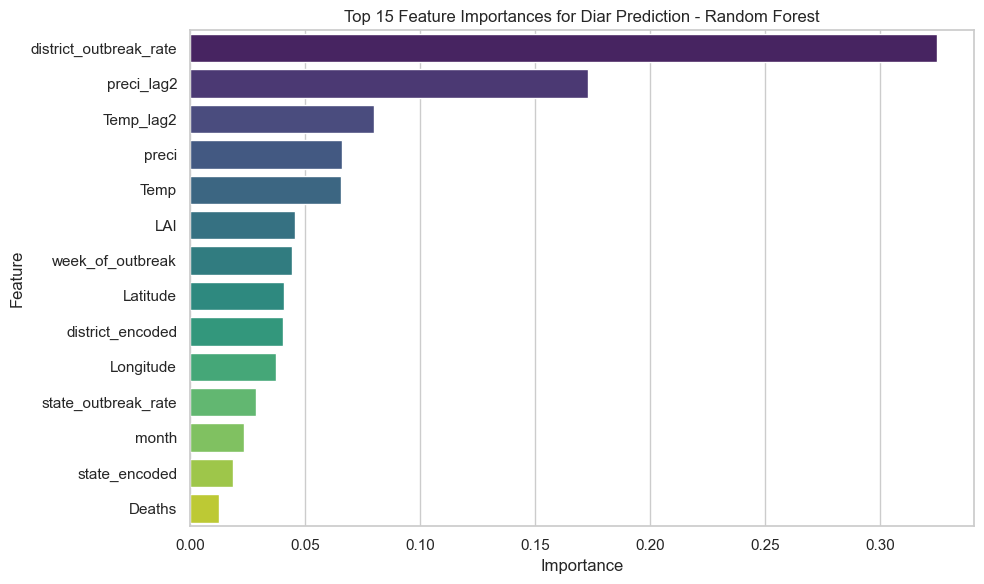

In [218]:
# -----------------------------
# 1. Filter for given state (assuming df_dia is your original dataset)
# -----------------------------
df_sampled = df_dia.copy()  # or use your pre-processed sampled data

# -----------------------------
# 2. Preprocess features 
# -----------------------------

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Encode categorical variables
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

# Drop unnecessary columns
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day", "year"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Ensure feature names match the imputed matrix
feature_names = X.columns[:X_imputed.shape[1]]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Continue with training and plotting...


# -----------------------------
# 3. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 4. Train Random Forest model
# -----------------------------
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced_subsample",
    max_depth=8,
    min_samples_split=5
)
rf_model.fit(X_train, y_train)

# -----------------------------
# 5. Evaluate the model
# -----------------------------
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# -----------------------------
# 6. Feature Importance Plot
# -----------------------------
# Get feature importances
importances = rf_model.feature_importances_

# Check length match (optional debug)
assert len(feature_names) == len(importances), "Mismatch in feature names and importances length!"

# Create DataFrame for plotting feature importances
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top 10 important features
print("\nTop 10 Important Features:")
print(feat_imp_df.head(10))

# Plot the top 15 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances for Diar Prediction - Random Forest')
plt.tight_layout()
plt.show()



Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.51      0.60       658
           1       0.44      0.69      0.54       368

    accuracy                           0.57      1026
   macro avg       0.59      0.60      0.57      1026
weighted avg       0.64      0.57      0.58      1026

ROC-AUC: 0.6710222016651248

Top 10 Important Features:
                   Feature  Importance
11  district_outbreak_rate    0.324640
9               preci_lag2    0.172748
8                Temp_lag2    0.079976
5                    preci    0.066041
7                     Temp    0.065316
6                      LAI    0.045641
0         week_of_outbreak    0.044305
3                 Latitude    0.040876
12        district_encoded    0.040400
4                Longitude    0.037113


C:\Users\shash\AppData\Local\Temp\ipykernel_44168\3616703248.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')


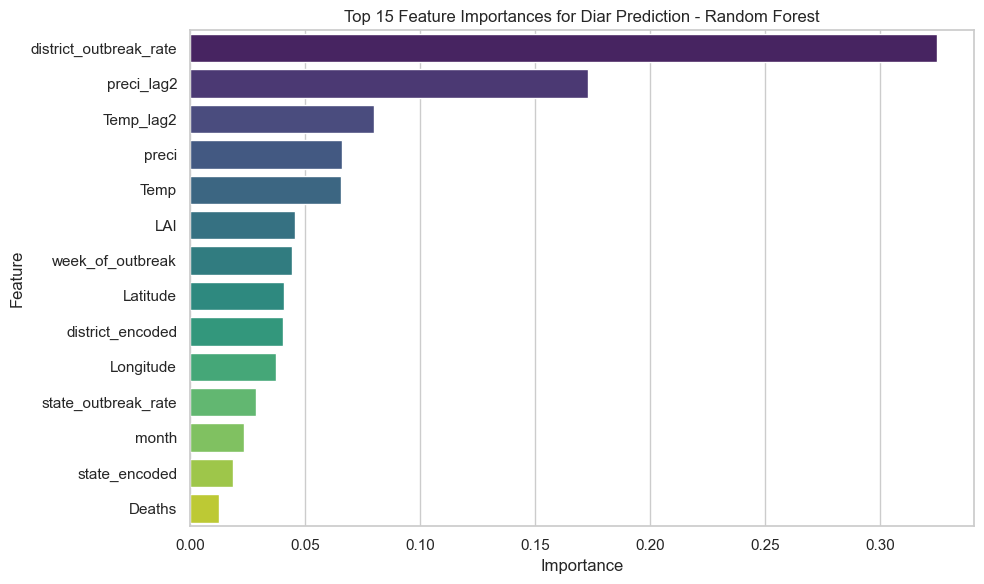

In [219]:
# -----------------------------
# 1. Filter for given state (assuming df_dia is your original dataset)
# -----------------------------
df_sampled = df_dia.copy()  # or use your pre-processed sampled data

# -----------------------------
# 2. Preprocess features 
# -----------------------------

le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

# Drop unnecessary columns
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day", "year"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 3. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 4. Train Random Forest model
# -----------------------------
rf_model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced_subsample",
    max_depth=8,
    min_samples_split=5
)
rf_model.fit(X_train, y_train)

# -----------------------------
# 5. Evaluate the model
# -----------------------------
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# -----------------------------
# 6. Feature Importance Plot
# -----------------------------
# Get feature importances
importances = rf_model.feature_importances_

# Get feature names from the pre-processed dataset (before dropping columns)
feature_names = X.columns

# Create DataFrame for plotting feature importances
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top 10 important features
print("\nTop 10 Important Features:")
print(feat_imp_df.head(10))

# Plot the top 15 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances for Diar Prediction - Random Forest')
plt.tight_layout()
plt.show()

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best hyperparameters found:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'class_weight': None, 'bootstrap': False}

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.97      0.78       658
           1       0.65      0.12      0.20       368

    accuracy                           0.66      1026
   macro avg       0.66      0.54      0.49      1026
weighted avg       0.66      0.66      0.57      1026

ROC-AUC: 0.6720918131359853

Top 10 Important Features:
                   Feature  Importance
12  district_outbreak_rate    0.456933
10              preci_lag2    0.261966
9                Temp_lag2    0.070083
8                     Temp    0.038028
3                     year    0.034472
6                    preci    0.025250
0         week_of_outbreak    0.019404
4                 Latitude    0.018775
11     state_outbreak_r

C:\Users\shash\AppData\Local\Temp\ipykernel_44168\3545018236.py:106: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')


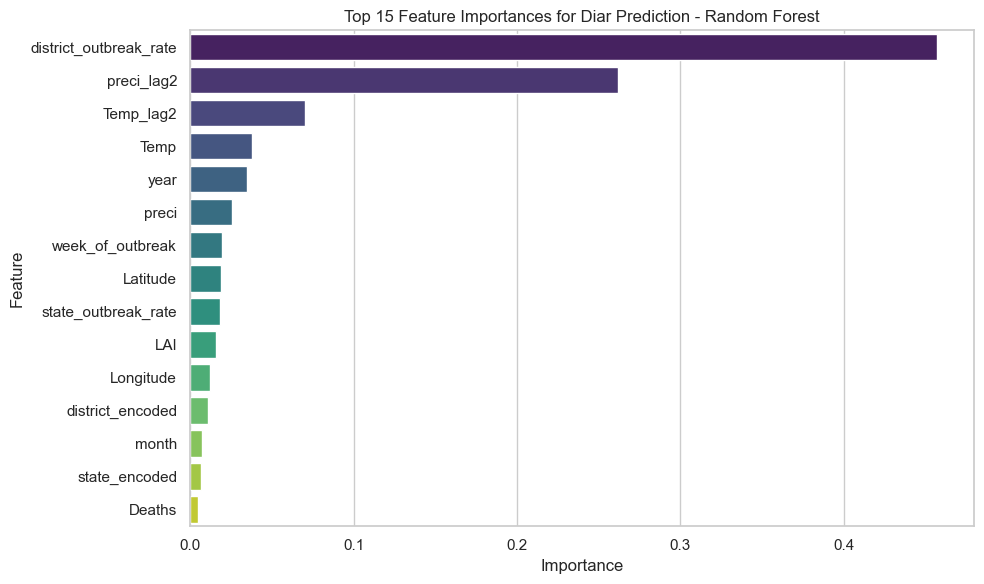

In [220]:
### RAndomized search CV
# -----------------------------
# 1. Filter for given state (assuming df_dia is your original dataset)
# -----------------------------
df_sampled = df_dia.copy()  # or use your pre-processed sampled data

# -----------------------------
# 2. Preprocess features 
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])

# Drop unnecessary columns
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 3. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 4. Set up RandomizedSearchCV for Random Forest model
# -----------------------------
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# Hyperparameter space to search
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'class_weight': ['balanced_subsample', 'balanced', None]
}

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    rf_model,
    param_distributions=param_dist,
    n_iter=50,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit RandomizedSearchCV to training data
random_search.fit(X_train, y_train)

# Best hyperparameters from RandomizedSearchCV
print("Best hyperparameters found: ", random_search.best_params_)

# -----------------------------
# 5. Evaluate the best model from RandomizedSearchCV
# -----------------------------
best_rf_model = random_search.best_estimator_

# Predict using the best model
y_pred = best_rf_model.predict(X_test)
y_prob = best_rf_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# -----------------------------
# 6. Feature Importance Plot for the Best Model
# -----------------------------
# Get feature importances
importances = best_rf_model.feature_importances_

# Get feature names from the pre-processed dataset (before dropping columns)
feature_names = X.columns

# Create DataFrame for plotting feature importances
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print top 10 important features
print("\nTop 10 Important Features:")
print(feat_imp_df.head(10))

# Plot the top 15 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances for Diar Prediction - Random Forest')
plt.tight_layout()
plt.show()



Sampled dataset shape: (5127, 21)
diar_outbreak_flag
0    0.641701
1    0.358299
Name: proportion, dtype: float64


C:\Users\shash\anaconda3\envs\newenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:52:19] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.61      0.66       658
           1       0.45      0.58      0.51       368

    accuracy                           0.60      1026
   macro avg       0.58      0.59      0.58      1026
weighted avg       0.62      0.60      0.60      1026

ROC-AUC: 0.6605284458834413


 98%|===================| 1006/1026 [00:22<00:00]       

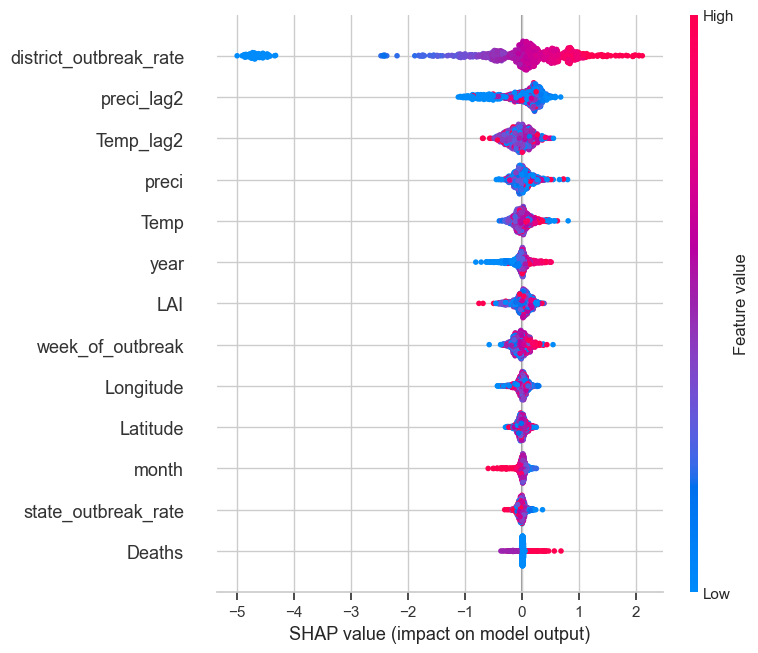

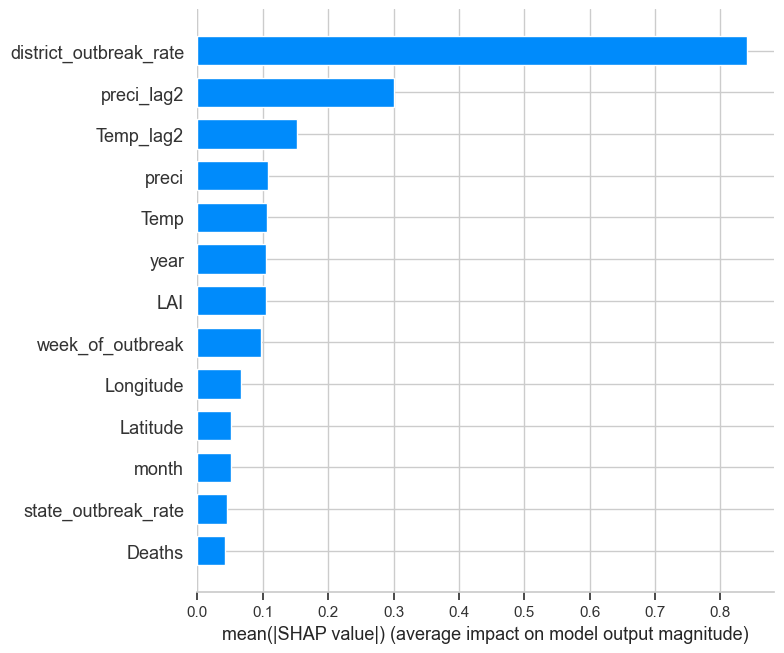


Top 10 Important Features based on SHAP values:
                   Feature  SHAP Importance
12  district_outbreak_rate         0.839850
10              preci_lag2         0.299895
9                Temp_lag2         0.152629
6                    preci         0.107479
8                     Temp         0.106099
3                     year         0.105544
7                      LAI         0.105499
0         week_of_outbreak         0.097197
5                Longitude         0.066478
4                 Latitude         0.051894


In [221]:
### Lets try with XGBoost Model


from sklearn.metrics import classification_report, roc_auc_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE, RandomOverSampler

# -----------------------------
# 1. Filter for given state (example already pre-filtered)
# -----------------------------
df_xgsample = df_dia.copy()




print("Sampled dataset shape:", df_xgsample.shape)
print(df_xgsample["diar_outbreak_flag"].value_counts(normalize=True))

# -----------------------------
# 4. Preprocess features 
# -----------------------------
le_district = LabelEncoder()
df_sampled["district_encoded"] = le_district.fit_transform(df_sampled["district"])

le_state = LabelEncoder()
df_sampled["state_encoded"] = le_state.fit_transform(df_sampled["state_ut"])


drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day"]
X = df_xgsample.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_xgsample["diar_outbreak_flag"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 5. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 6. Train XGBoost model
# -----------------------------
scale_pos_weight = (len(y_train) - sum(y_train)) / sum(y_train)  # imbalance ratio

xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=scale_pos_weight,
    use_label_encoder=False,
    eval_metric="logloss"
)

xgb_model.fit(X_train, y_train)

# -----------------------------
# 8. Evaluate
# -----------------------------
y_pred = xgb_model.predict(X_test)
y_prob = xgb_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# Create the SHAP explainer
explainer = shap.Explainer(xgb_model, X_train)

# Get SHAP values for the test set
shap_values = explainer(X_test)

# Plot SHAP values (Summary plot) with feature names
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Alternatively, you can also plot the bar chart for feature importance with actual feature names
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)

# You can also use SHAP dependence plots to analyze relationships between specific features and the prediction
# shap.dependence_plot('feature_name', shap_values, X_test)

# -----------------------------
# Extract Feature Importance Values
# -----------------------------

# Extracting the average absolute SHAP values for each feature
feature_importance_values = np.abs(shap_values.values).mean(axis=0)

# Combine with feature names
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'SHAP Importance': feature_importance_values
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='SHAP Importance', ascending=False)

# Display top 10 important features
print("\nTop 10 Important Features based on SHAP values:")
print(feature_importance_df.head(10))


Weather Factors: Precipitation and temperature, both current and lagged (past data), have the highest influence on outbreaks, suggesting a strong relationship between weather patterns and disease outbreaks.

Geographical Influence: Location-based features (latitude, longitude, state outbreak rate) also have substantial importance, pointing to regional patterns and geographical factors as crucial to outbreak prediction.

Temporal Factors: Features like week_of_outbreak and month indicate that outbreaks follow time-dependent patterns, likely tied to seasonal trends or periodic environmental changes.

Vegetation (LAI): LAI’s moderate importance suggests that vegetation, possibly influencing vector populations, also plays a role in predicting outbreaks.


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       658
           1       0.52      0.42      0.46       368

    accuracy                           0.65      1026
   macro avg       0.61      0.60      0.60      1026
weighted avg       0.64      0.65      0.64      1026

ROC-AUC: 0.6676936038059997


C:\Users\shash\AppData\Local\Temp\ipykernel_44168\3518192951.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importances_df.head(15), x='RF Importance', y='Feature', palette='viridis')


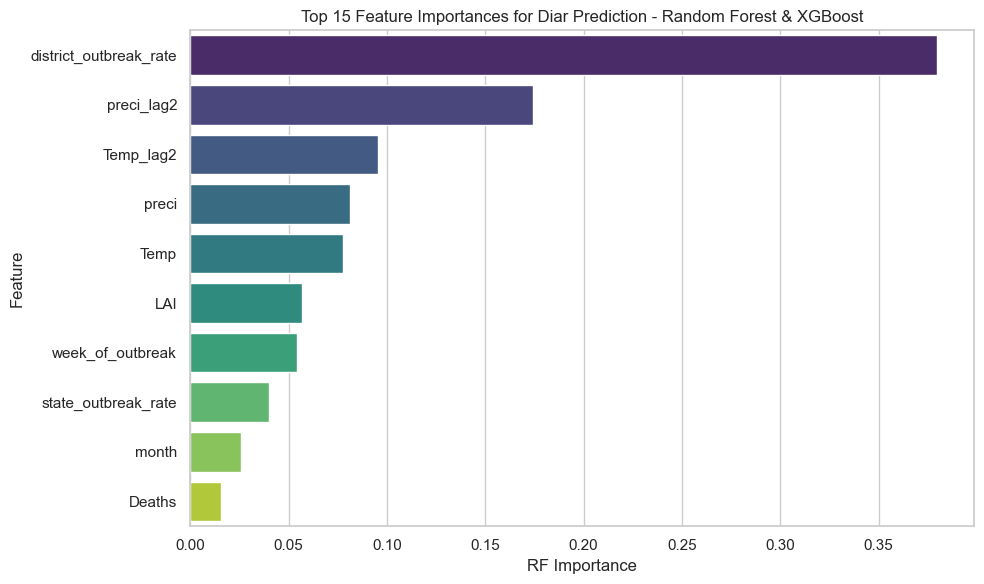

In [222]:
### Ensemble with disease break out rate at state and district level 

# -----------------------------
# 1. Filter for given state (assuming df_dia is your original dataset)
# -----------------------------
df_sampled = df_dia.copy()  # or use your pre-processed sampled data

# -----------------------------
# 2. Preprocess features 
# -----------------------------



# Drop unnecessary columns
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day", "year", "Latitude", "Longitude"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 3. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# -----------------------------
# 4. Set up individual models for ensemble
# -----------------------------
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

# Define individual models
rf_model = RandomForestClassifier(
    n_estimators=300, 
    random_state=42,
    class_weight="balanced_subsample", 
    max_depth=8, 
    min_samples_split=5
)

xgb_model = XGBClassifier(
    n_estimators=300, 
    random_state=42, 
    scale_pos_weight=1  # Adjust according to the imbalance
)

log_model = LogisticRegression(
    random_state=42,
    max_iter=500
)

# -----------------------------
# 5. Create ensemble model (VotingClassifier with soft voting)
# -----------------------------
ensemble_model = VotingClassifier(
    estimators=[('rf', rf_model), ('xgb', xgb_model), ('lr', log_model)],
    voting='soft'  # Use soft voting (probability-based)
)

# -----------------------------
# 6. Train individual models first
# -----------------------------
rf_model.fit(X_train, y_train)   # Fit Random Forest model separately
xgb_model.fit(X_train, y_train)  # Fit XGBoost model separately
log_model.fit(X_train, y_train)  # Fit Logistic Regression model separately

# Then train the ensemble model
ensemble_model.fit(X_train, y_train)

# -----------------------------
# 7. Evaluate the ensemble model
# -----------------------------
y_pred = ensemble_model.predict(X_test)
y_prob = ensemble_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# -----------------------------
# 8. Feature Importance Plot (for Random Forest and XGBoost)
# -----------------------------
# Get feature importances from Random Forest
rf_importances = rf_model.feature_importances_

# Get feature importances from XGBoost
xgb_importances = xgb_model.feature_importances_

# Combine and plot importances
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'RF Importance': rf_importances,
    'XGBoost Importance': xgb_importances
}).sort_values(by='RF Importance', ascending=False)

# Plotting the top 15 features based on Random Forest importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importances_df.head(15), x='RF Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances for Diar Prediction - Random Forest & XGBoost')
plt.tight_layout()
plt.show()


In [223]:
df_dia.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5127 entries, 2014-01-04 to 2020-12-28
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   week_of_outbreak        5127 non-null   int64         
 1   state_ut                5127 non-null   object        
 2   district                5127 non-null   object        
 3   Disease                 5127 non-null   object        
 4   Cases                   5127 non-null   int64         
 5   Deaths                  5127 non-null   int64         
 6   day                     5127 non-null   int64         
 7   month                   5127 non-null   int64         
 8   year                    5127 non-null   int64         
 9   Latitude                5127 non-null   float64       
 10  Longitude               5127 non-null   float64       
 11  preci                   5127 non-null   float64       
 12  LAI                     5127 n

In [224]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame
df = df_sampled.copy()  # Use the actual DataFrame here

# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()

# List of categorical columns
categorical_cols = ['state_ut', 'district', 'Disease']

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# 1. Convert numerical columns to discrete (bins)
# We can discretize continuous variables (e.g., 'Latitude', 'Longitude', etc.) into bins, if necessary
# Here, we convert a few numerical features into categorical (bins) for testing purposes
df['Temp_binned'] = pd.cut(df['Temp'], bins=5, labels=[0, 1, 2, 3, 4])
df['preci_binned'] = pd.cut(df['preci'], bins=5, labels=[0, 1, 2, 3, 4])

# 2. Prepare features and target for Chi-Square Test
X = df.drop(columns=['diar_outbreak_flag', 'week_start_date', 'Cases','cases_4wk_avg', 'year'])
y = df['diar_outbreak_flag']

# 3. Apply Chi-Square test
chi2_results = []
for column in X.columns:
    # Create contingency table
    contingency_table = pd.crosstab(X[column], y)
    
    # Perform Chi-Square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    chi2_results.append((column, chi2_stat, p_val))

# Convert results to a DataFrame for easier viewing
chi2_results_df = pd.DataFrame(chi2_results, columns=['Feature', 'Chi2 Stat', 'P-Value'])


# Display features with p-values below a threshold (e.g., 0.05)


print("\nChi-Square Test Results with P-Value < 0.05:")
print(chi2_results_df[chi2_results_df['P-Value'] < 0.05].sort_values(by='P-Value'))


chi2_stats, p_values = chi2(X, y)

# Create a DataFrame to show the results
chi2_results = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Stat': chi2_stats,
    'P-Value': p_values
})

# Sort by Chi-Square statistic
chi2_results = chi2_results.sort_values(by='Chi2 Stat', ascending=False)

# Print all results
print("\n\nChi-Square Test Results for all features:")
print(chi2_results)




Chi-Square Test Results with P-Value < 0.05:
                   Feature    Chi2 Stat       P-Value
15  district_outbreak_rate   535.393069  1.011328e-67
13              preci_lag2  4175.473751  2.616868e-05
12               Temp_lag2  3503.078061  9.475554e-05
4                   Deaths    28.849763  2.395005e-03
0         week_of_outbreak    79.127964  9.026343e-03
14     state_outbreak_rate    46.134160  1.687908e-02


Chi-Square Test Results for all features:
                   Feature  Chi2 Stat       P-Value
15  district_outbreak_rate  35.876887  2.101874e-09
13              preci_lag2  14.767830  1.215923e-04
10                     LAI  12.855265  3.365311e-04
7                 Latitude  10.236990  1.376520e-03
4                   Deaths   5.947251  1.474026e-02
2                 district   3.268988  7.060117e-02
17            preci_binned   2.245068  1.340410e-01
1                 state_ut   2.193397  1.386033e-01
5                      day   1.997878  1.575196e-01
6           

| Feature                  | Chi2 Stat | P-Value                |
| ------------------------ | --------- | ---------------------- |
| `district_outbreak_rate` | 535.39    | 1.01 X 10^{-67}        |
| `preci_lag2`             | 4175.47   | 2.62 X 10^{-5}         |
| `Temp_lag2`              | 3503.08   | 9.48 X 10^{-5}         |
| `Deaths`                 | 28.85     | 0.0024                 |
| `state_outbreak_rate`    | 46.13     | 0.0169                 |


For outbreak prediction, district-level outbreak rate, recent precipitation, and temperature appear to be the most important features. These environmental factors, along with historical death rates, should be considered as primary predictors in your models.


In [225]:
!pip install tensorflow


C:\Users\shash\anaconda3\envs\newenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.6331 - loss: 0.6671 - val_accuracy: 0.6420 - val_loss: 0.6539
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.6416 - loss: 0.6548 - val_accuracy: 0.6420 - val_loss: 0.6540
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6416 - loss: 0.6519 - val_accuracy: 0.6420 - val_loss: 0.6550
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6416 - loss: 0.6525 - val_accuracy: 0.6420 - val_loss: 0.6547
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.6416 - loss: 0.6518 - val_accuracy: 0.6420 - val_loss: 0.6566
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6416 - loss: 0.6506 - val_accuracy: 0.6420 - val_loss: 0.6550
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.6416 - loss: 0.6507 - val_accuracy: 0.6420 - val_loss: 0.6558
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.6416 - loss: 0.6503 - val_accuracy: 0.6420 - 

C:\Users\shash\anaconda3\envs\newenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\shash\anaconda3\envs\newenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\shash\anaconda3\envs\newenv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.sh

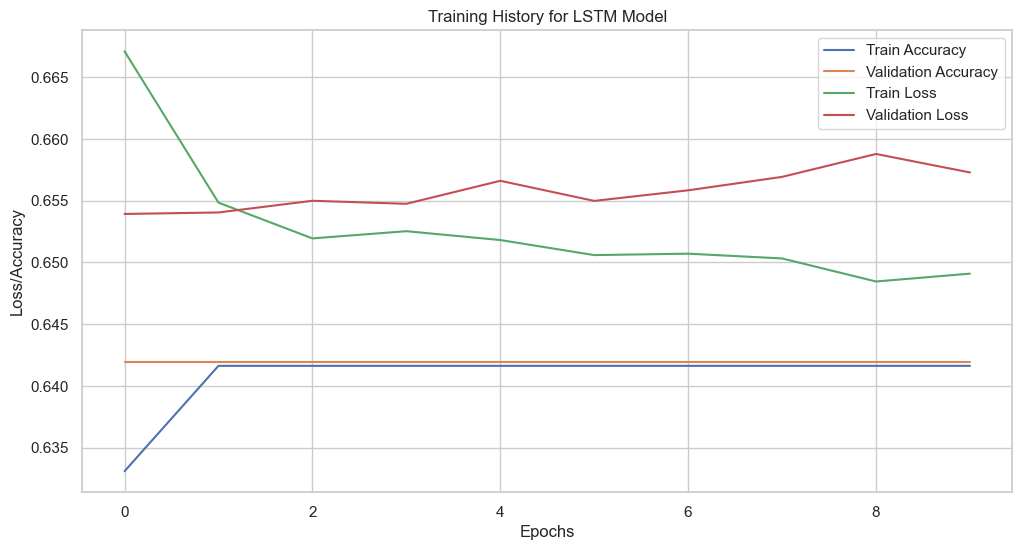

In [226]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Filter for given state (assuming df_dia is your original dataset)
# -----------------------------
df_sampled = df_dia.copy()  # or use your pre-processed sampled data

# -----------------------------
# 2. Preprocess features 
# -----------------------------


# Drop unnecessary columns
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day", "year", "Latitude", "Longitude"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 3. Reshape Data for LSTM (3D array: [samples, time_steps, features])
# -----------------------------

# Here, we'll use a time window of 3 days for LSTM input
time_steps = 3
X_seq = []
y_seq = []

# Create sequences from the data
for i in range(time_steps, len(X_scaled)):
    X_seq.append(X_scaled[i-time_steps:i])  # past 3 time steps as features
    y_seq.append(y.iloc[i])  # current step as target

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# -----------------------------
# 4. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=42
)

# -----------------------------
# 5. Build LSTM Model
# -----------------------------
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------------
# 6. Train the Model
# -----------------------------
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# -----------------------------
# 7. Evaluate the Model
# -----------------------------
y_pred = (model.predict(X_test) > 0.5).astype(int)
y_prob = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# -----------------------------
# 8. Plot Training History
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History for LSTM Model')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

# -----------------------------
# 9. Feature Importance (for LSTM, this isn't as straightforward, but you can use SHAP or LIME)
# -----------------------------
# SHAP or LIME would need to be integrated here to interpret the LSTM model, 
# since LSTM is a black-box model in terms of direct feature importances.


Epoch 1/10


C:\Users\shash\anaconda3\envs\newenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.6304 - loss: 0.6524 - val_accuracy: 0.6634 - val_loss: 0.6249
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.6489 - loss: 0.6248 - val_accuracy: 0.6624 - val_loss: 0.6210
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6538 - loss: 0.6198 - val_accuracy: 0.6527 - val_loss: 0.6148
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6511 - loss: 0.6127 - val_accuracy: 0.6605 - val_loss: 0.6075
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6572 - loss: 0.5992 - val_accuracy: 0.6702 - val_loss: 0.6004
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6667 - loss: 0.5939 - val_accuracy: 0.6644 - val_loss: 0.6018
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6685 - loss: 0.5877 - val_accuracy: 0.6663 - val_loss: 0.6011
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6750 - loss: 0.5842 - val_accuracy: 0.6702 - val_loss: 0.

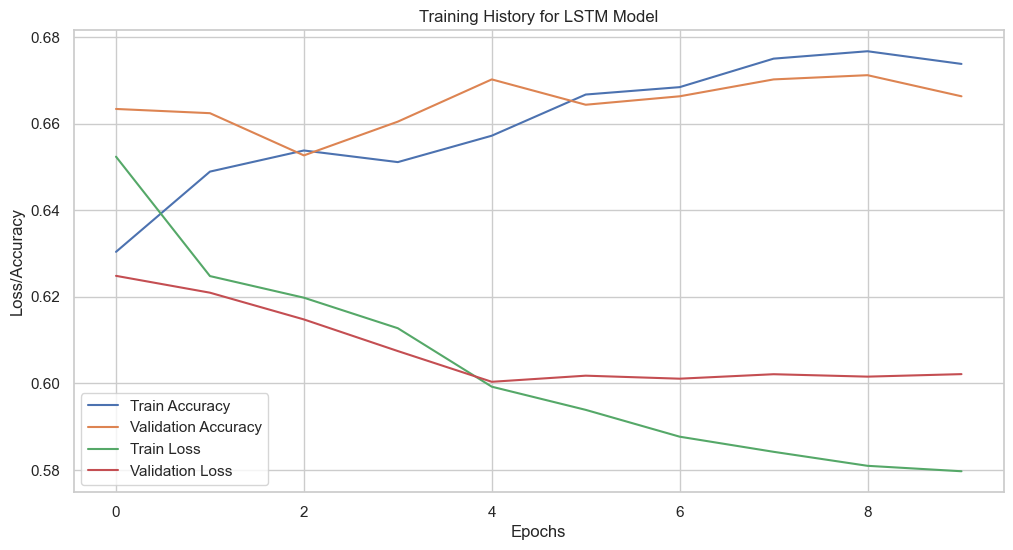

In [227]:
# -----------------------------
# 1. Filter for given state (assuming df_dia is your original dataset)
# -----------------------------
df_sampled = df_dia.copy()  # or use your pre-processed sampled data

# -----------------------------
# 2. Preprocess features 
# -----------------------------



# -----------------------------
# 3. Sort Data by state, district, year, and week_of_outbreak for proper sequencing
# -----------------------------

# Do NOT drop the columns we will use for sorting yet
df_sampled_sorted = df_sampled.sort_values(by=['state_ut', 'district', 'year', 'week_of_outbreak'])

# -----------------------------
# 4. Drop unnecessary columns after sorting
# -----------------------------

# Now drop the unnecessary columns after sorting
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day"]
X = df_sampled_sorted.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled_sorted["diar_outbreak_flag"]

# Handle missing values
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# -----------------------------
# 5. Reshape Data for LSTM (3D array: [samples, time_steps, features])
# -----------------------------

# Here, we'll use a time window of 3 days for LSTM input
time_steps = 3
X_seq = []
y_seq = []

# Create sequences from the data
for i in range(time_steps, len(X_scaled)):
    X_seq.append(X_scaled[i-time_steps:i])  # past 3 time steps as features
    y_seq.append(y.iloc[i])  # current step as target

X_seq = np.array(X_seq)
y_seq = np.array(y_seq)

# -----------------------------
# 6. Train-test split (stratified)
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_seq, y_seq, test_size=0.2, stratify=y_seq, random_state=42
)

# -----------------------------
# 7. Build LSTM Model
# -----------------------------
model = Sequential()
model.add(LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(32))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))  # For binary classification

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# -----------------------------
# 8. Train the Model
# -----------------------------
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

# -----------------------------
# 9. Evaluate the Model
# -----------------------------
y_pred = (model.predict(X_test) > 0.5).astype(int)
y_prob = model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# -----------------------------
# 10. Plot Training History
# -----------------------------
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History for LSTM Model')
plt.xlabel('Epochs')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

# -----------------------------
# 11. Feature Importance (for LSTM, this isn't as straightforward, but you can use SHAP or LIME)
# -----------------------------
# SHAP or LIME would need to be integrated here to interpret the LSTM model, 
# since LSTM is a black-box model in terms of direct feature importances.


Epoch 1/150


C:\Users\shash\anaconda3\envs\newenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5874 - loss: 0.6788 - val_accuracy: 0.6459 - val_loss: 0.6543
Epoch 2/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6320 - loss: 0.6418 - val_accuracy: 0.6391 - val_loss: 0.6174
Epoch 3/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6354 - loss: 0.6202 - val_accuracy: 0.6330 - val_loss: 0.6045
Epoch 4/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6432 - loss: 0.6128 - val_accuracy: 0.6375 - val_loss: 0.6019
Epoch 5/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6451 - loss: 0.6115 - val_accuracy: 0.6444 - val_loss: 0.6013
Epoch 6/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6480 - loss: 0.6095 - val_accuracy: 0.6459 - val_loss: 0.6000
Epoch 7/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6453 - loss: 0.6079 - val_accuracy: 0.6482 - val_loss: 0.5998
Epoch 8/150
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6453 - loss: 0.6074 - val_accuracy: 0.6444 - val_loss: 

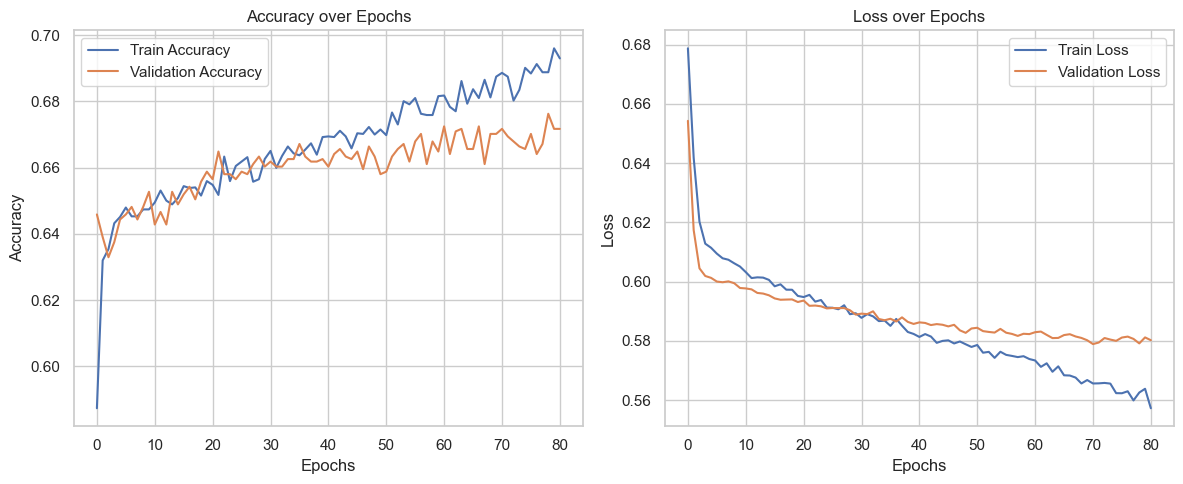

In [228]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Preprocess Features (Assuming you have a dataset 'df_dia')
df_sampled = df_dia.copy()


df_sampled = df_sampled.sort_values(by=['state_ut', 'district', 'year', 'week_of_outbreak'])

# Drop unnecessary columns
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Step 2: Handle missing values (if any)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 3: Sorting the records based on 'state_ut', 'district', 'year', and 'week_of_outbreak'
#df_sampled_sorted = df_sampled.sort_values(by=['state_ut', 'district', 'year', 'week_of_outbreak'])

# Rescale after sorting to ensure we follow proper data temporal and spatial dependencies
X_sorted = df_sampled_sorted.drop(columns=drop_cols + ["diar_outbreak_flag"])
X_sorted_imputed = imputer.transform(X_sorted)
X_sorted_scaled = scaler.transform(X_sorted_imputed)

# Step 4: Balance the classes with SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_sorted_scaled, y)

# Step 5: Train-Test Split (Stratified Split to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Reshape the data for LSTM (LSTM expects 3D input)
X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))  # (samples, timesteps, features)
X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Step 6: Build the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(100, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 7: Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 8: Train the model with EarlyStopping
history = model.fit(X_train_lstm, y_train, epochs=150, batch_size=64, validation_data=(X_test_lstm, y_test), 
                    callbacks=[early_stopping])

# Step 9: Evaluate the model
y_pred = (model.predict(X_test_lstm) > 0.5).astype(int)  # Convert probabilities to 0 or 1
y_prob = model.predict(X_test_lstm)  # Probabilities for ROC-AUC

# Step 10: Performance Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

# Step 11: Plot Training & Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100


C:\Users\shash\anaconda3\envs\newenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5078 - loss: 0.6937 - val_accuracy: 0.4924 - val_loss: 0.6944
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.5194 - loss: 0.6922 - val_accuracy: 0.5000 - val_loss: 0.6943
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5249 - loss: 0.6911 - val_accuracy: 0.4863 - val_loss: 0.6951
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5329 - loss: 0.6897 - val_accuracy: 0.4840 - val_loss: 0.6956
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5363 - loss: 0.6886 - val_accuracy: 0.4924 - val_loss: 0.6962
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5356 - loss: 0.6882 - val_accuracy: 0.4855 - val_loss: 0.6969
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5555 - loss: 0.6854 - val_accuracy: 0.4848 - val_loss: 0.6980
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5559 - loss: 0.6845 - val_accuracy: 0.4756 - val_l

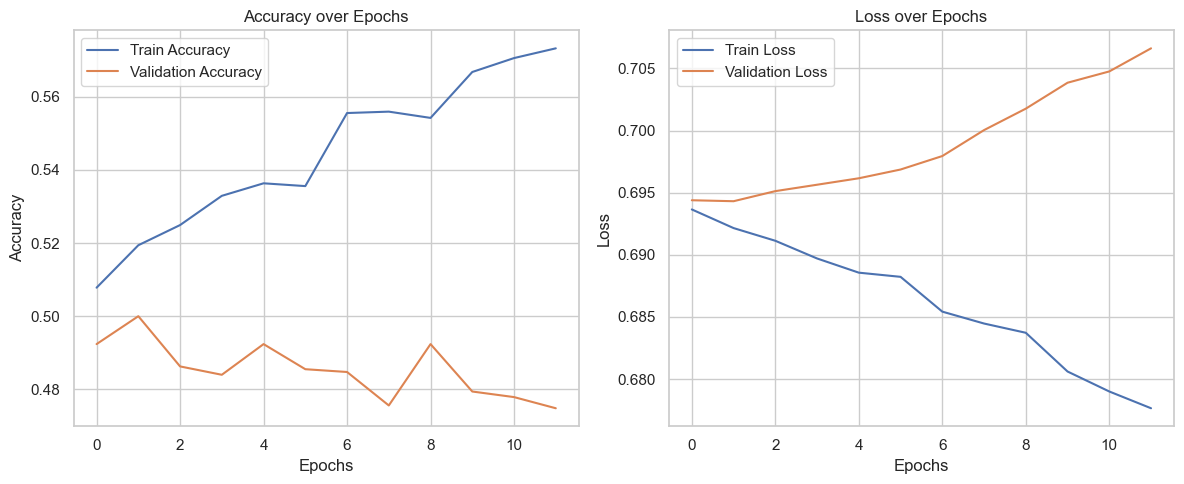

In [229]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Preprocess Features (Assuming you have a dataset 'df_dia')
df_sampled = df_dia.copy()


# Step 2: Sorting the records based on 'state_ut', 'district', 'year', and 'week_of_outbreak'
df_sampled = df_sampled.sort_values(by=['state_ut', 'district', 'year', 'week_of_outbreak'])

# Drop unnecessary columns
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Step 3: Handle missing values (if any)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 4: Balance the classes with SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 5: Train-Test Split (Stratified Split to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Step 6: Reshape the data for LSTM (LSTM expects 3D input)
timesteps = 4  # Use previous 4 weeks as input for prediction
X_train_lstm = []
y_train_lstm = []
X_test_lstm = []
y_test_lstm = []

# Prepare the data in sequences of 4 weeks (timesteps = 4)
for i in range(timesteps, len(X_train)):
    X_train_lstm.append(X_train[i-timesteps:i])  # Last 4 weeks data (timesteps)
    y_train_lstm.append(y_train.iloc[i])  # Current week label

for i in range(timesteps, len(X_test)):
    X_test_lstm.append(X_test[i-timesteps:i])  # Last 4 weeks data (timesteps)
    y_test_lstm.append(y_test.iloc[i])  # Current week label

X_train_lstm, y_train_lstm = np.array(X_train_lstm), np.array(y_train_lstm)
X_test_lstm, y_test_lstm = np.array(X_test_lstm), np.array(y_test_lstm)

# Step 7: Build the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.2))  # Dropout to prevent overfitting
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 8: Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 9: Train the model with EarlyStopping
history = model.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=64, validation_data=(X_test_lstm, y_test_lstm), 
                    callbacks=[early_stopping])

# Step 10: Evaluate the model
y_pred = (model.predict(X_test_lstm) > 0.5).astype(int)  # Convert probabilities to 0 or 1
y_prob = model.predict(X_test_lstm)  # Probabilities for ROC-AUC

# Step 11: Performance Evaluation
print("\nClassification Report:")
print(classification_report(y_test_lstm, y_pred))
print("ROC-AUC:", roc_auc_score(y_test_lstm, y_prob))

# Step 12: Plot Training & Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Epoch 1/100


C:\Users\shash\anaconda3\envs\newenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


83/83 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.5096 - loss: 0.6933 - val_accuracy: 0.4996 - val_loss: 0.6934
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.5098 - loss: 0.6931 - val_accuracy: 0.4821 - val_loss: 0.6936
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5163 - loss: 0.6925 - val_accuracy: 0.5057 - val_loss: 0.6934
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5178 - loss: 0.6919 - val_accuracy: 0.4989 - val_loss: 0.6941
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.5273 - loss: 0.6912 - val_accuracy: 0.5050 - val_loss: 0.6941
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5273 - loss: 0.6905 - val_accuracy: 0.4935 - val_loss: 0.6956
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5309 - loss: 0.6882 - val_accuracy: 0.4874 - val_loss: 0.7014
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.5343 - loss: 0.6876 - val_accuracy: 0.4950 - val_l

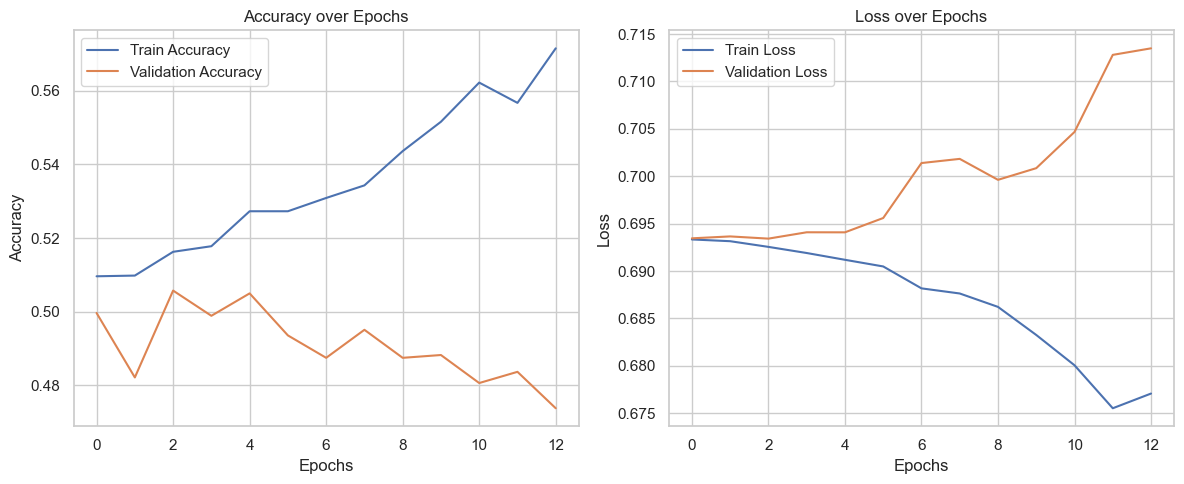

In [230]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Preprocess Features (Assuming you have a dataset 'df_dia')
df_sampled = df_dia.copy()


# Step 2: Sorting the records based on 'state_ut', 'district', 'year', and 'week_of_outbreak'
df_sampled = df_sampled.sort_values(by=['state_ut', 'district', 'year', 'week_of_outbreak'])

# Drop unnecessary columns
drop_cols = ["state_ut", "district", "Disease", "week_start_date", "Cases", "cases_4wk_avg", "day"]
X = df_sampled.drop(columns=drop_cols + ["diar_outbreak_flag"])
y = df_sampled["diar_outbreak_flag"]

# Step 3: Handle missing values (if any)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(X)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 4: Balance the classes with SMOTE (Synthetic Minority Over-sampling Technique)
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Step 5: Train-Test Split (Stratified Split to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Step 6: Reshape the data for LSTM (LSTM expects 3D input)
timesteps = 3  # Use previous 6 weeks as input for prediction (Increase timesteps)
X_train_lstm = []
y_train_lstm = []
X_test_lstm = []
y_test_lstm = []

# Prepare the data in sequences of 6 weeks (timesteps = 6)
for i in range(timesteps, len(X_train)):
    X_train_lstm.append(X_train[i-timesteps:i])  # Last 6 weeks data (timesteps)
    y_train_lstm.append(y_train.iloc[i])  # Current week label

for i in range(timesteps, len(X_test)):
    X_test_lstm.append(X_test[i-timesteps:i])  # Last 6 weeks data (timesteps)
    y_test_lstm.append(y_test.iloc[i])  # Current week label

X_train_lstm, y_train_lstm = np.array(X_train_lstm), np.array(y_train_lstm)
X_test_lstm, y_test_lstm = np.array(X_test_lstm), np.array(y_test_lstm)

# Step 7: Build the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(100, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
model.add(Dropout(0.3))  # Increase dropout to prevent overfitting
model.add(LSTM(50, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))  # Binary classification output

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 8: Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Step 9: Train the model with EarlyStopping
history = model.fit(X_train_lstm, y_train_lstm, epochs=100, batch_size=64, validation_data=(X_test_lstm, y_test_lstm), 
                    callbacks=[early_stopping])

# Step 10: Evaluate the model
y_pred = (model.predict(X_test_lstm) > 0.5).astype(int)  # Convert probabilities to 0 or 1
y_prob = model.predict(X_test_lstm)  # Probabilities for ROC-AUC

# Step 11: Performance Evaluation
print("\nClassification Report:")
print(classification_report(y_test_lstm, y_pred))
print("ROC-AUC:", roc_auc_score(y_test_lstm, y_prob))

# Step 12: Plot Training & Validation Accuracy and Loss
plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
